In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


# **Install Libraries**

In [2]:
!pip install ultralytics roboflow -q

# **Import Necessary Library**

In [3]:
import os
import zipfile
import shutil
import glob
import pandas as pd
import yaml
from roboflow import Roboflow
from ultralytics import YOLO
from google.colab import files
import urllib.request
from IPython.display import Image as DisplayImage, display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Download Dataset**

In [4]:
rf = Roboflow(api_key="M3muRl1hPuXKRSPEEQcw")
project = rf.workspace("joseph-nelson").project("hard-hat-workers")

dataset = project.version(12).download("yolov8",location="/content/working/hard_hat_dataset")

print("✓ Dataset downloaded successfully")
print("✓ Location:", dataset.location)


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/working/hard_hat_dataset in yolov8:: 100%|██████████| 33746/33746 [00:03<00:00, 9090.41it/s] 

✓ Dataset downloaded successfully
✓ Location: /content/working/hard_hat_dataset


# **Dataset Overview**

In [5]:
# Path to data.yaml
yaml_path = "/content/working/hard_hat_dataset/data.yaml"

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

print("\n" + "="*70)
print(" DATASET CONFIGURATION (data.yaml)")
print("="*70)

# Class info
print(f"Number of classes (nc): {data['nc']}")
print(f"Class names: {data['names']}")

# Split paths (relative paths in YOLO)
train_images_path = os.path.join(os.path.dirname(yaml_path), data["train"].replace("../", ""))
val_images_path   = os.path.join(os.path.dirname(yaml_path), data["val"].replace("../", ""))
test_images_path  = os.path.join(os.path.dirname(yaml_path), data["test"].replace("../", ""))

print("\nDataset split paths:")
print(f" Train images: {train_images_path}")
print(f" Validation images: {val_images_path}")
print(f" Test images: {test_images_path}")

# Count images
train_images = glob.glob(os.path.join(train_images_path, "*"))
val_images   = glob.glob(os.path.join(val_images_path, "*"))
test_images  = glob.glob(os.path.join(test_images_path, "*"))

print("\n" + "="*70)
print(" DATASET SPLIT STATISTICS")
print("="*70)

print(f" Training images   : {len(train_images)}")
print(f" Validation images : {len(val_images)}")
print(f" Test images       : {len(test_images)}")

total_images = len(train_images) + len(val_images) + len(test_images)
print(f"\n Total images      : {total_images}")

train_labels = glob.glob(train_images_path.replace("images", "labels") + "/*.txt")
val_labels   = glob.glob(val_images_path.replace("images", "labels") + "/*.txt")
test_labels  = glob.glob(test_images_path.replace("images", "labels") + "/*.txt")

print("\nLabel files:")
print(f" Training labels   : {len(train_labels)}")
print(f" Validation labels : {len(val_labels)}")
print(f" Test labels       : {len(test_labels)}")



 DATASET CONFIGURATION (data.yaml)
Number of classes (nc): 2
Class names: ['head', 'helmet']

Dataset split paths:
 Train images: /content/working/hard_hat_dataset/train/images
 Validation images: /content/working/hard_hat_dataset/valid/images
 Test images: /content/working/hard_hat_dataset/test/images

 DATASET SPLIT STATISTICS
 Training images   : 14748
 Validation images : 1413
 Test images       : 706

 Total images      : 16867

Label files:
 Training labels   : 14748
 Validation labels : 1413
 Test labels       : 706


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Model Design and Training**

In [9]:
print("\n\n Training YOLOv8m on Hard Hat Workers Dataset...")
location = '/content/working/hard_hat_dataset'
model = YOLO("yolov8m.pt")

results = model.train(
    data=os.path.join(location, 'data.yaml'),

    # TRAINING PARAMETERS
    epochs=30,
    imgsz=640,
    batch=8,

    # OPTIMIZER SETTINGS
    optimizer='SGD',
    lr0=0.01,
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,

    # AUGMENTATION SETTINGS
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10.0,
    translate=0.1,
    scale=0.5,
    fliplr=0.5,
    mosaic=0.7,
    mixup=0.1,

   # TRAINING CONTROL
    patience=5,
    warmup_epochs=1,
    device=0,

    project="/content/working",
    name="hardhat_workers_yolov8s_model",
    save=True,
    plots=True
)

print("\n Training complete!")




 Training YOLOv8m on Hard Hat Workers Dataset...
Ultralytics 8.4.1 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/working/hard_hat_dataset/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=0.7, multi_scale=0.0, name=hardhat_workers_yolov8s_model4, nbs=64, nms=False, opset=None, optim

# **Copy the best weights to the root working folder for downloading**

In [10]:

# Copy the best weights to the root working folder
shutil.copy(
    "/content/working/hardhat_workers_yolov8s_model/weights/best.pt",
    "/content/working/best1.pt"
)


'/content/working/best1.pt'



# **Model Export**

In [22]:
# Load your best model
model = YOLO('/content/working/hardhat_workers_yolov8s_model4/weights/best.pt')
# Export to ONNX
model.export(format='onnx', opset=12)  # widely compatible

# Export to TorchScript
model.export(format='torchscript')

# Export to TFLite (for mobile)
model.export(format='tflite')

# Export to CoreML (for Apple devices)
model.export(format='coreml')


Ultralytics 8.4.1 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 93 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/content/working/hardhat_workers_yolov8s_model4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)

ONNX: starting export with onnx 1.20.1 opset 12...
ONNX: slimming with onnxslim 0.1.82...
ONNX: export success ✅ 11.0s, saved as '/content/working/hardhat_workers_yolov8s_model4/weights/best.onnx' (98.8 MB)

Export complete (14.0s)
Results saved to /content/working/hardhat_workers_yolov8s_model4/weights
Predict:         yolo predict task=detect model=/content/working/hardhat_workers_yolov8s_model4/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/working/hardhat_workers_yolov8s_model4/weights/best.onnx imgsz=640 data=/content/working/hard_hat_dataset/data.yaml  
Visualize:       https://netron.app
Ultralytics 8.4.1 🚀 Pyt

Exporting to ONNX opset version 22 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 


ONNX: slimming with onnxslim 0.1.82...
ONNX: export success ✅ 9.3s, saved as '/content/working/hardhat_workers_yolov8s_model4/weights/best.onnx' (98.9 MB)
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100% ━━━━━━━━━━━━ 1/1 42.1files/s 0.0s
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.8...
Saved artifact at '/content/working/hardhat_workers_yolov8s_model4/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 6, 8400), dtype=tf.float32, name=None)
Captures:
  133617830467664: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  133617830466128: TensorSpec(shape=(3, 3, 3, 48), dtype=tf.float32, name=None)
  133617830466896: TensorSpec(shape=(48,), dtype=tf.float32, name=None)
  133617830471120: TensorSpe


CoreML: starting export with coremltools 9.0...


Running MIL backend_mlprogram pipeline: 100%|██████████| 12/12 [00:00<00:00, 90.66 passes/s]


CoreML: export success ✅ 23.6s, saved as '/content/working/hardhat_workers_yolov8s_model4/weights/best.mlpackage' (49.5 MB)

Export complete (26.9s)
Results saved to /content/working/hardhat_workers_yolov8s_model4/weights
Predict:         yolo predict task=detect model=/content/working/hardhat_workers_yolov8s_model4/weights/best.mlpackage imgsz=640  
Validate:        yolo val task=detect model=/content/working/hardhat_workers_yolov8s_model4/weights/best.mlpackage imgsz=640 data=/content/working/hard_hat_dataset/data.yaml  
Visualize:       https://netron.app


'/content/working/hardhat_workers_yolov8s_model4/weights/best.mlpackage'

# **Model Validation**

In [11]:
print("\n Validating model...\n")

metrics = model.val()

print("\n" + "="*70)
print("📊 VALIDATION RESULTS ")
print("="*70)
print(f"mAP50:      {metrics.box.map50:.4f}")
print(f"mAP50-95:   {metrics.box.map:.4f}")
print(f"Precision:  {metrics.box.mp:.4f}")
print(f"Recall:     {metrics.box.mr:.4f}")
print("="*70)



 Validating model...

Ultralytics 8.4.1 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 93 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 906.7±265.7 MB/s, size: 27.2 KB)
val: Scanning /content/working/hard_hat_dataset/valid/labels.cache... 1413 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1413/1413 658.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 89/89 2.3it/s 38.5s
                   all       1413       5252      0.906      0.862      0.915      0.369
                  head        256       1339      0.894      0.866      0.906      0.385
                helmet       1297       3913      0.917      0.859      0.924      0.353
Speed: 1.3ms preprocess, 22.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to /content/runs/detect/val

📊 VALIDATION RESULTS 
mAP50:      0.9154
mAP50-95:   0.36

TRAINING RESULTS:

 epoch  train/box_loss  train/cls_loss  val/box_loss  val/cls_loss  metrics/mAP50(B)  metrics/mAP50-95(B)
    14         1.48586         1.02901       2.13850       0.87077           0.91389              0.36123
    15         1.47828         1.01989       2.12267       0.83888           0.91362              0.35718
    16         1.45871         0.97893       2.13860       0.83624           0.91691              0.35087
    17         1.45533         0.97152       2.18650       0.83823           0.92014              0.34275
    18         1.44202         0.94702       2.09734       0.80616           0.92279              0.36089

FINAL EPOCH RESULTS:
Epoch: 18
Train Box Loss: 1.4420
Train Cls Loss: 0.9470
Val Box Loss: 2.0973
Val Cls Loss: 0.8062
Precision: 0.9196
Recall: 0.8712
mAP50: 0.9228
mAP50-95: 0.3609

TRAINING CURVES:


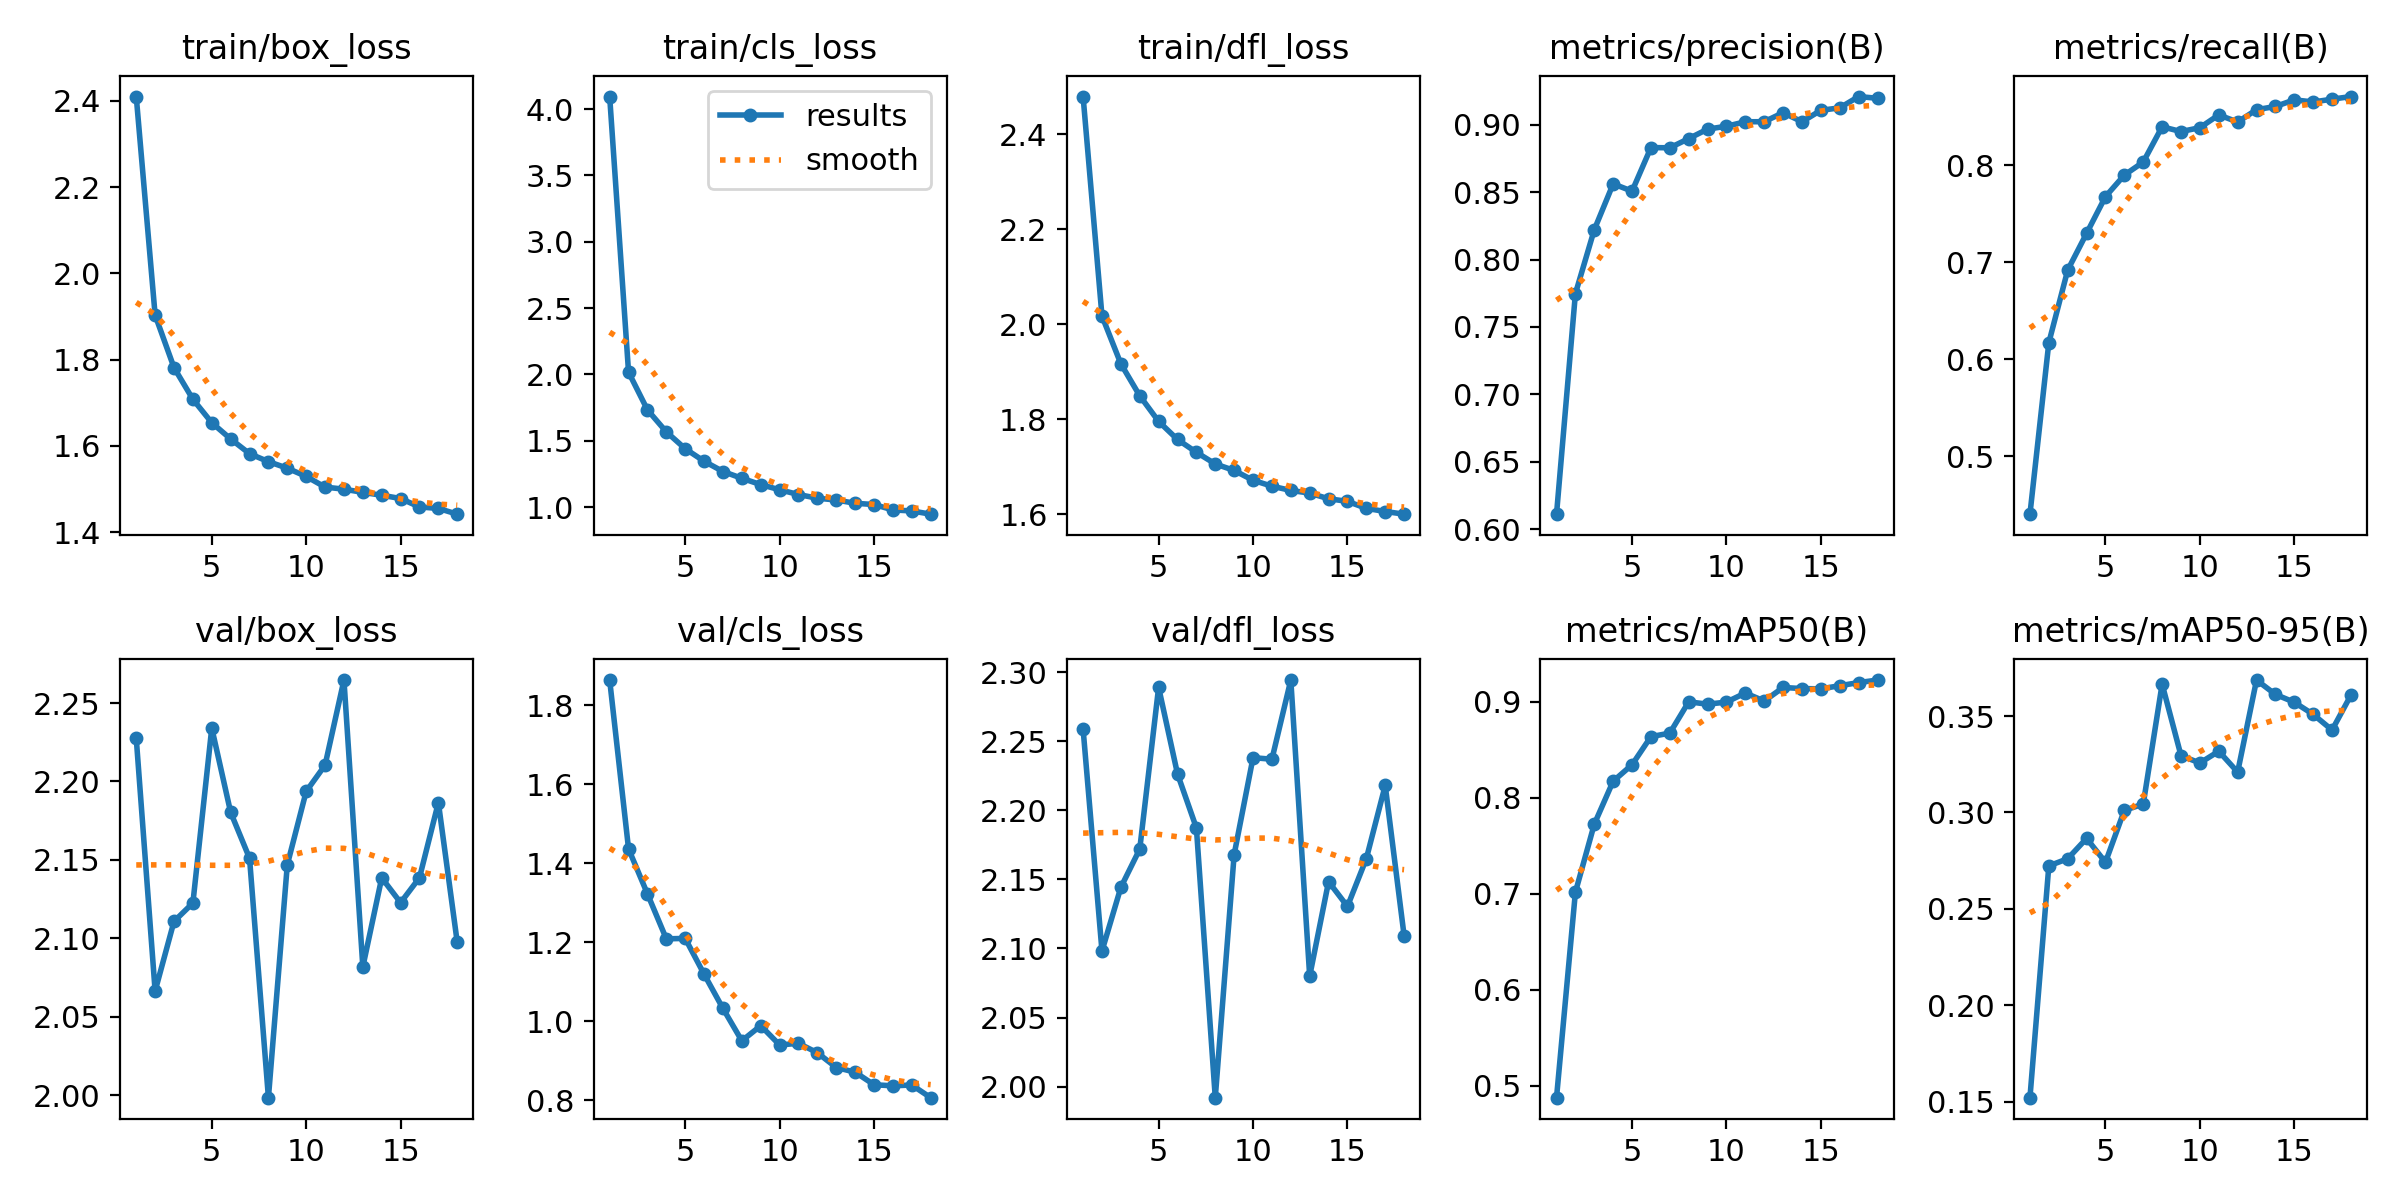


DISPLAYING EVALUATION CURVES:

F1 Score Curve:


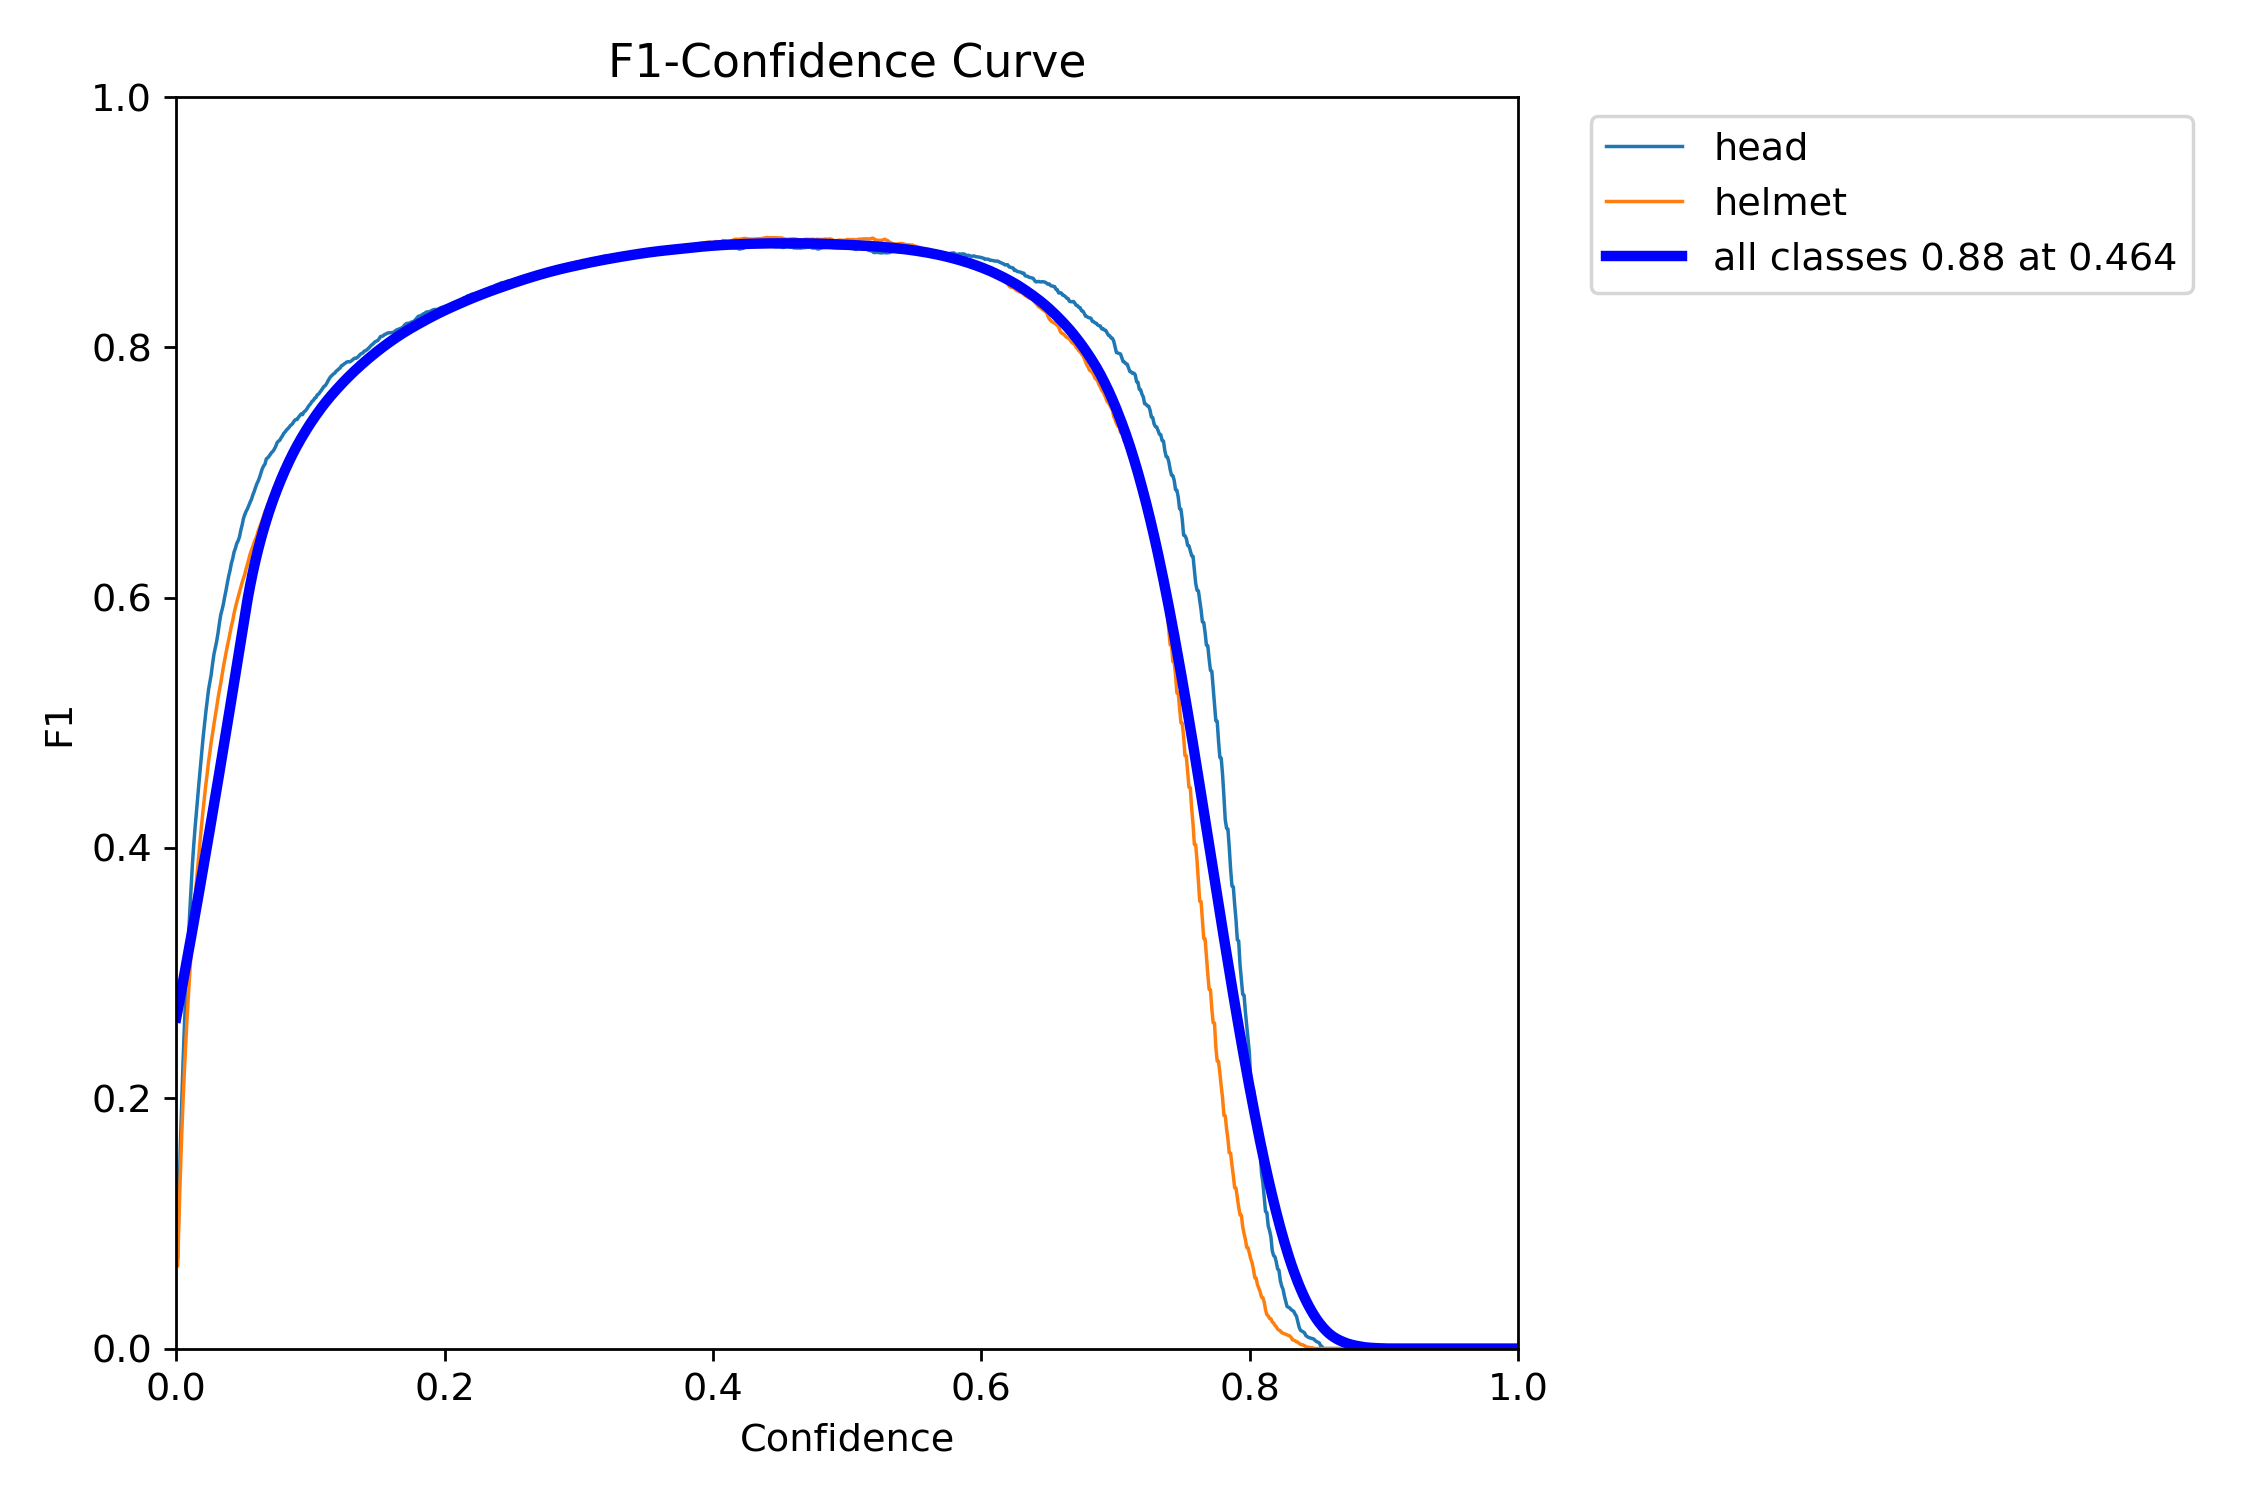


Precision-Recall Curve:


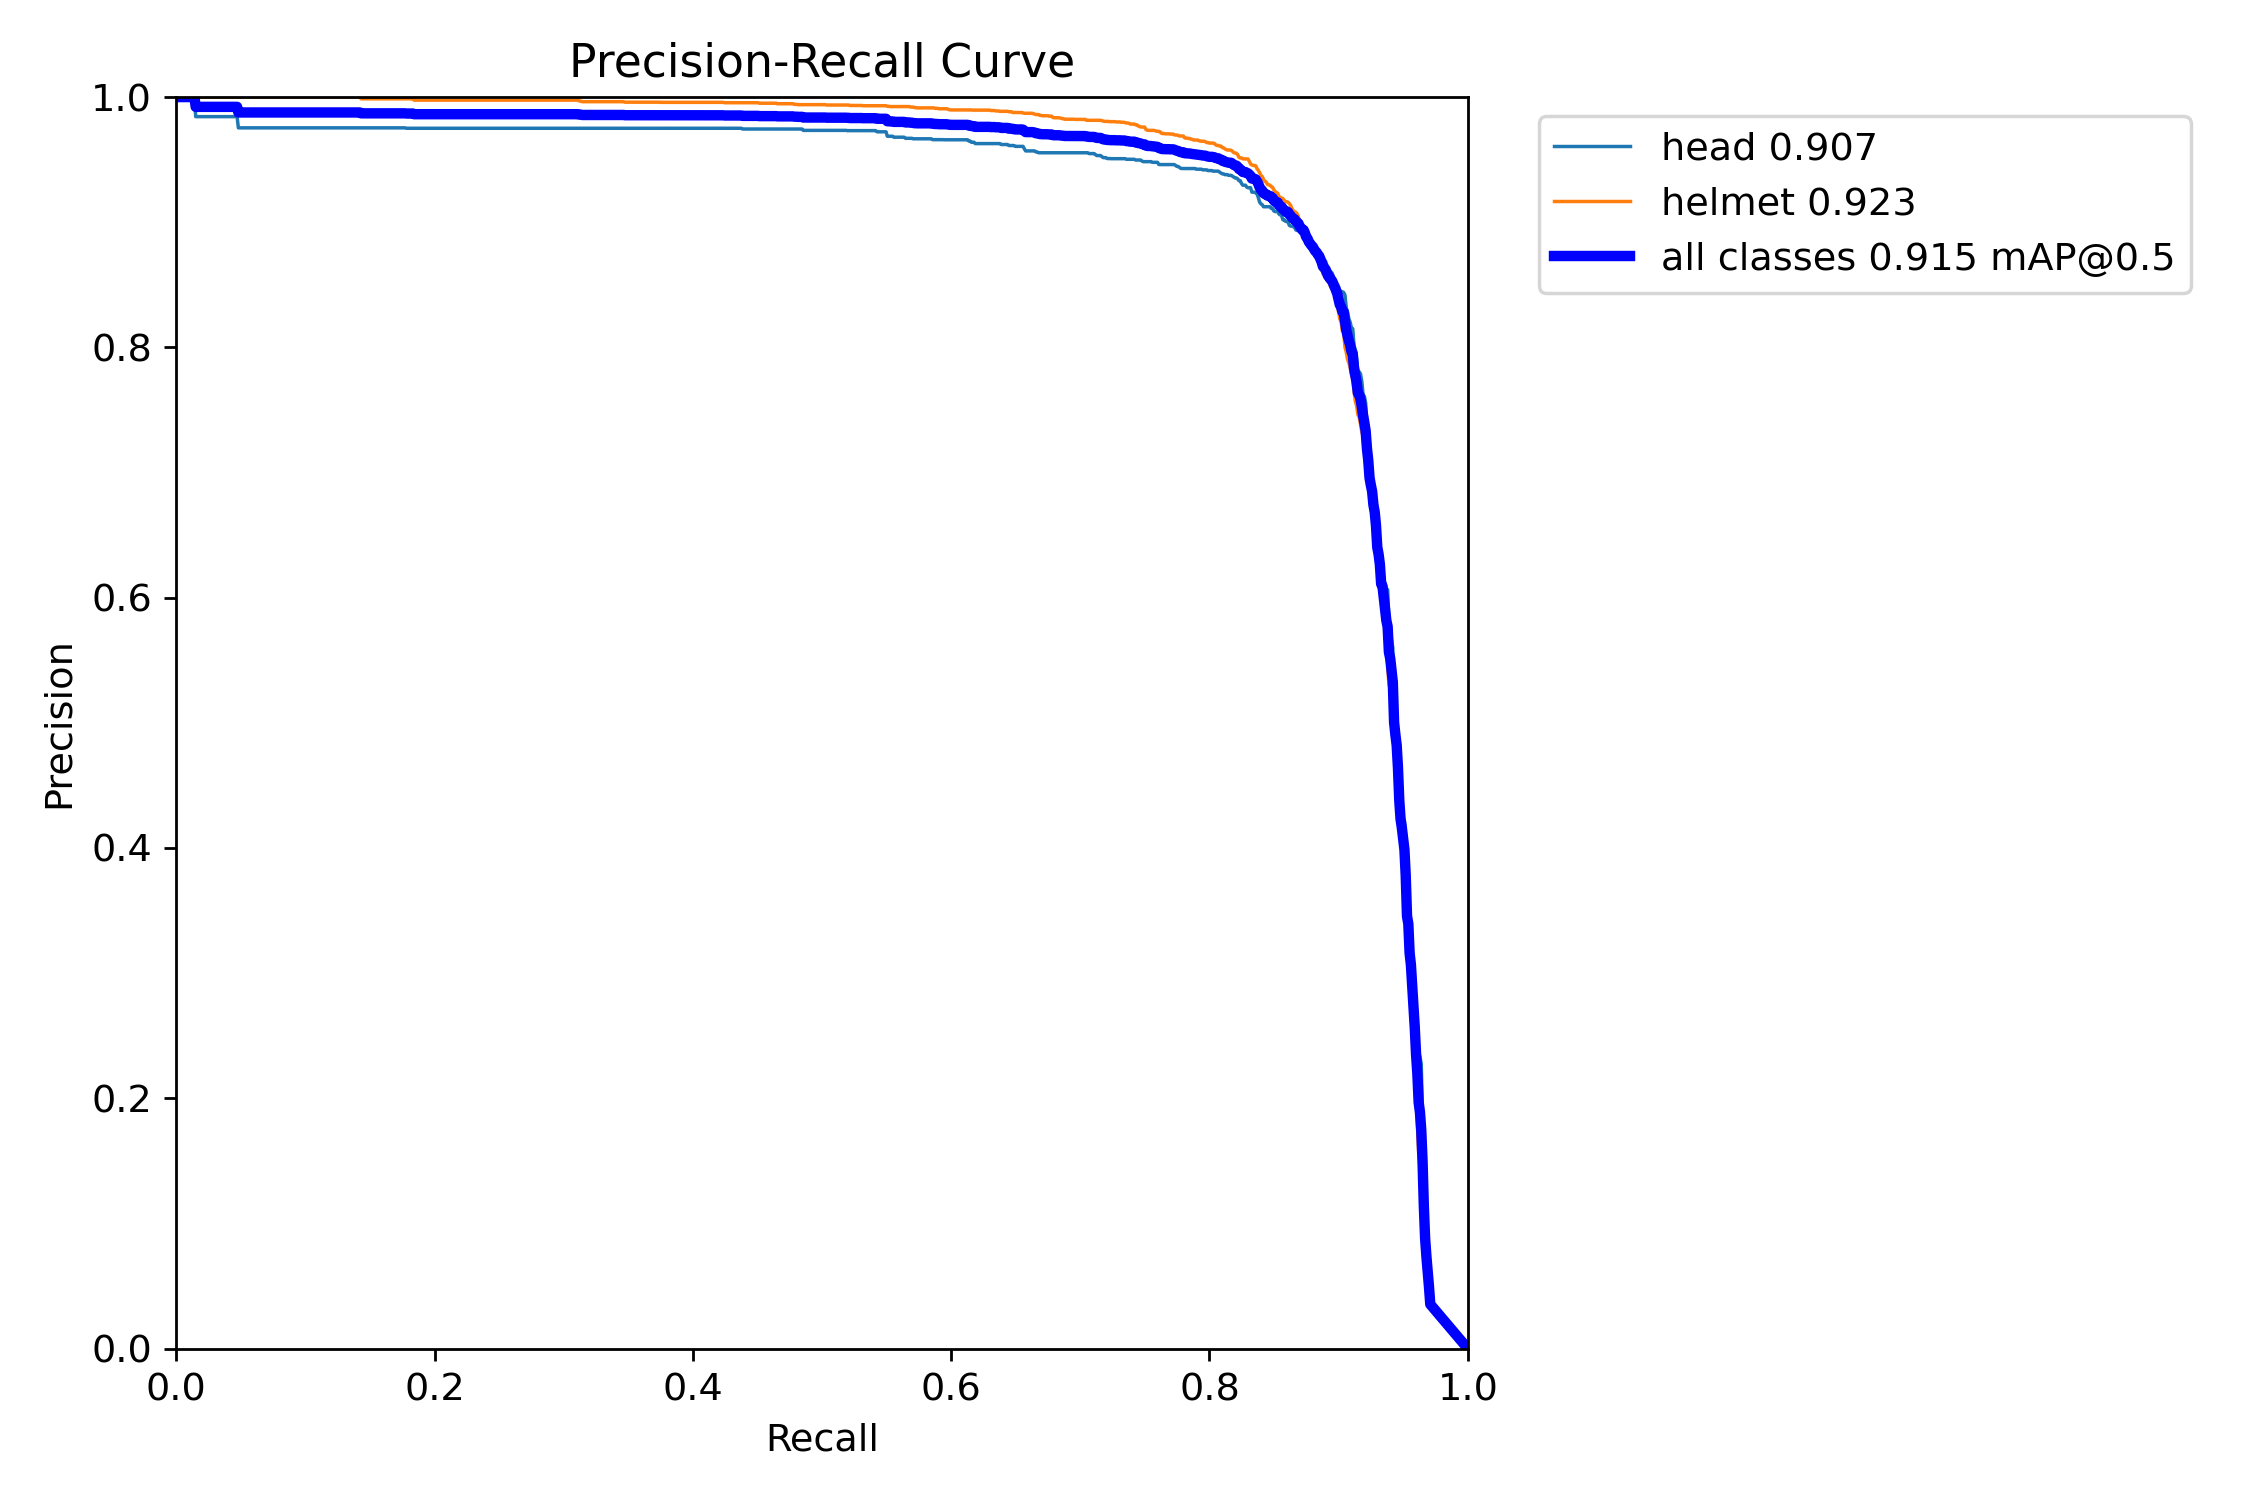


Precision Curve:


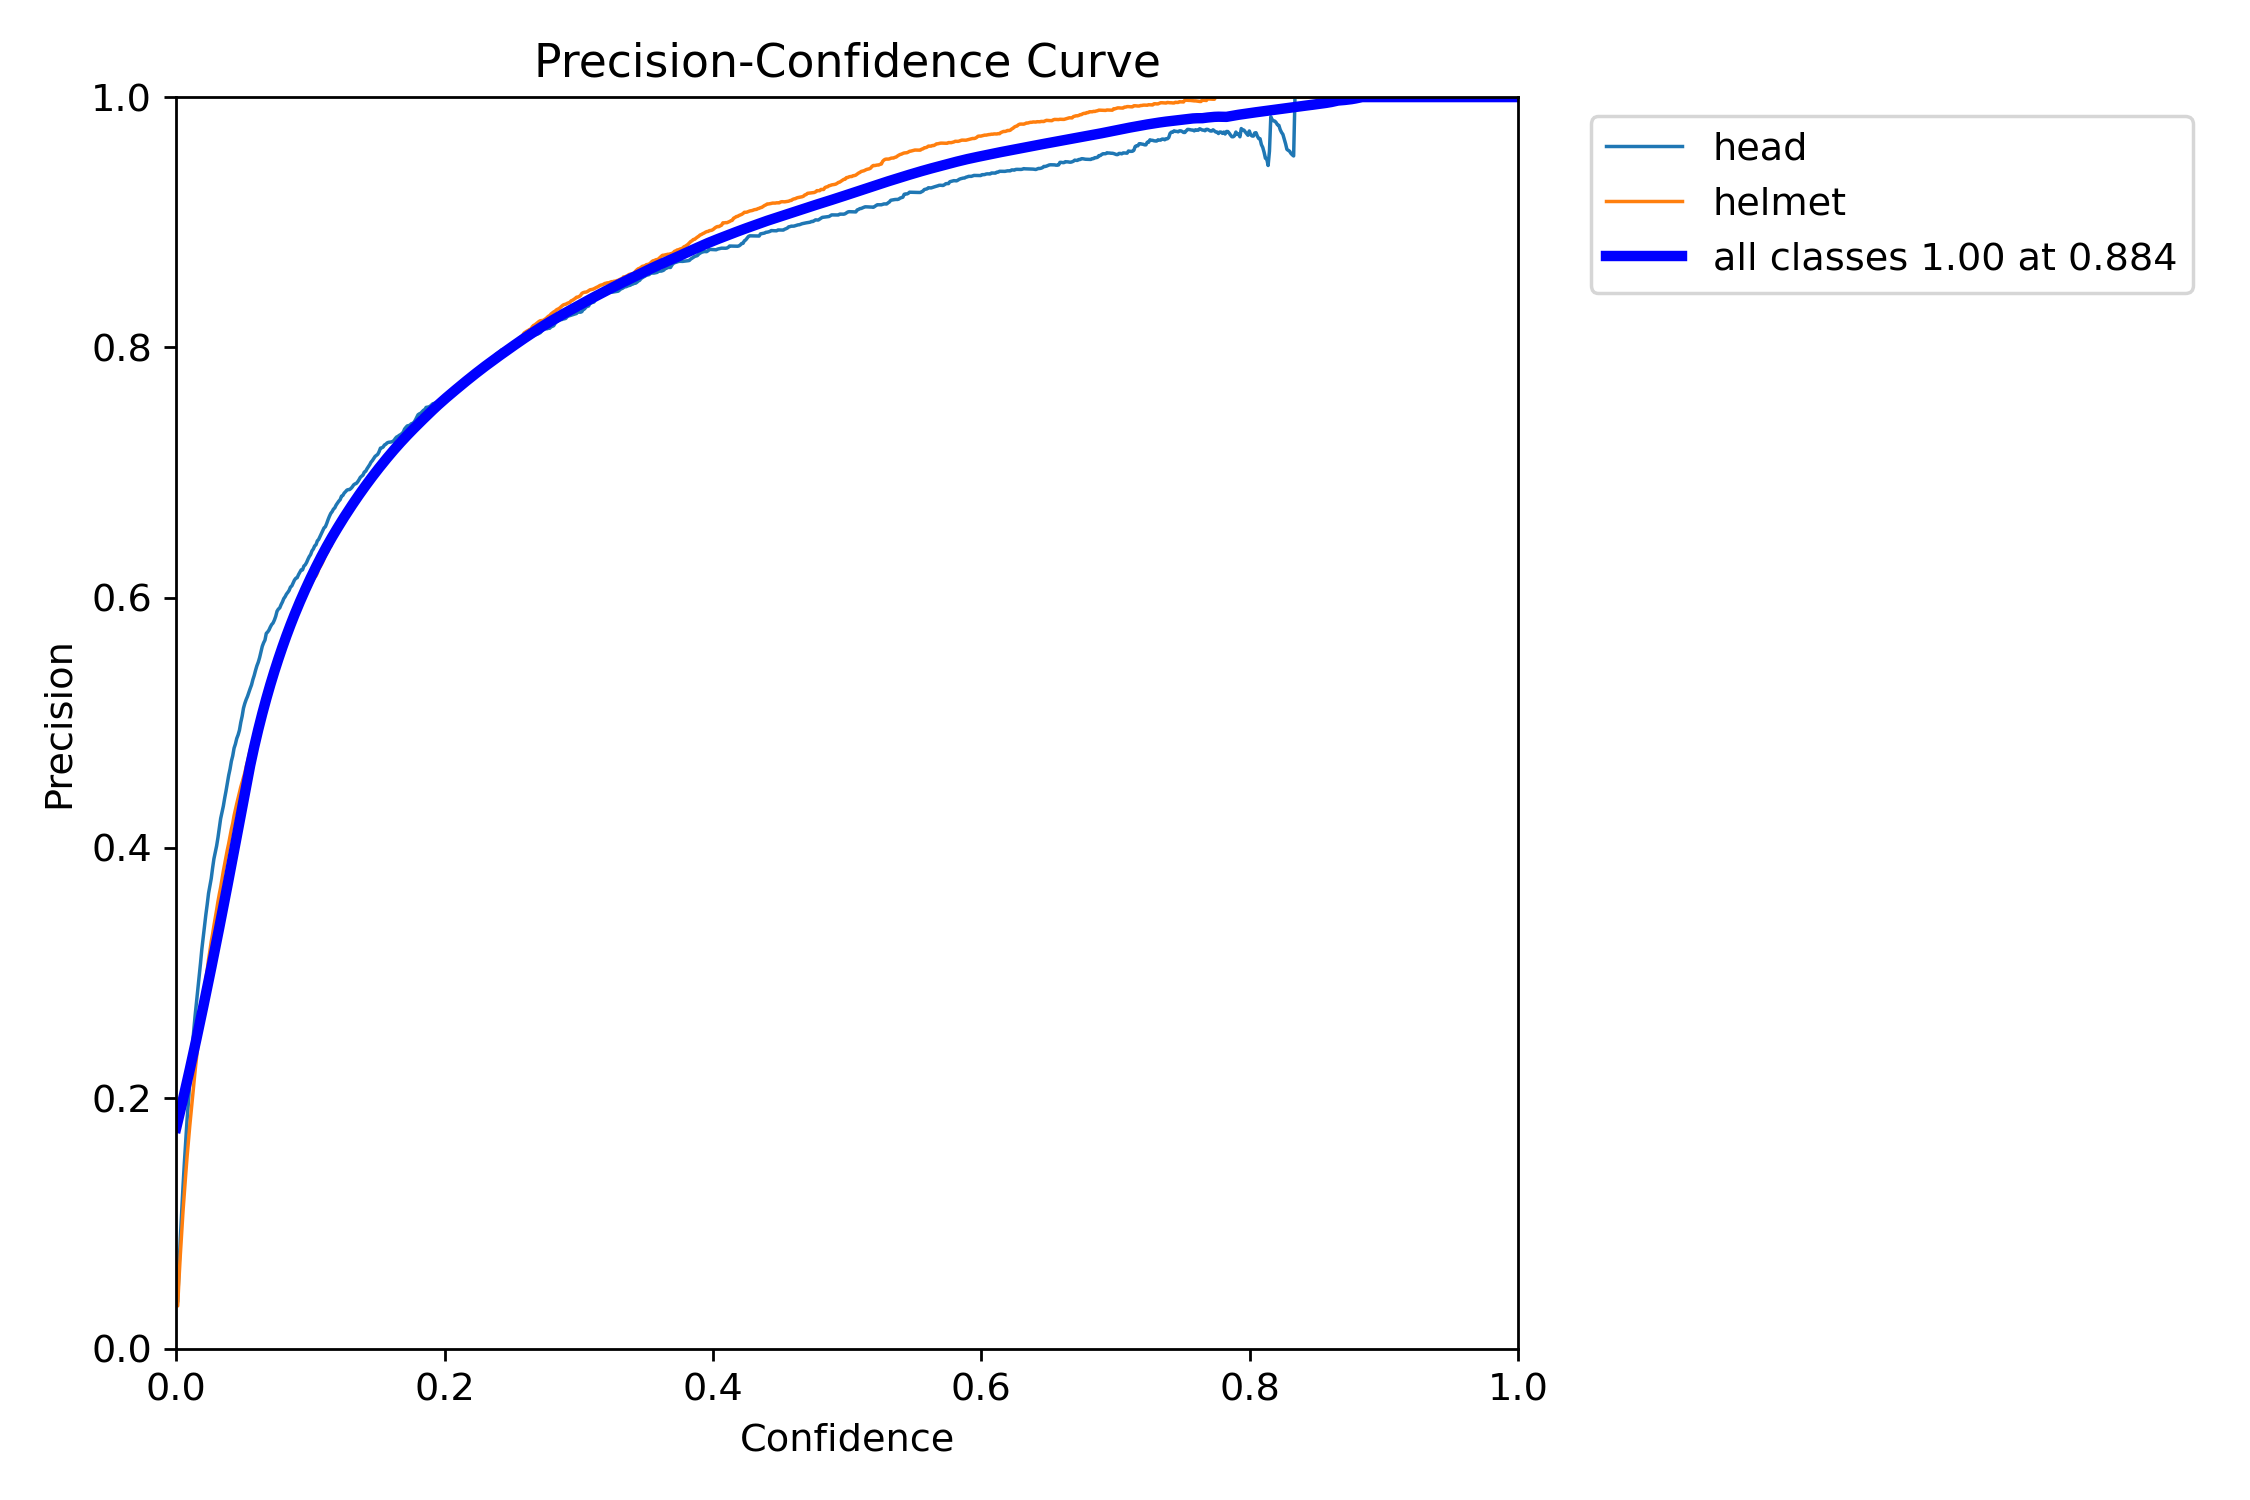


Recall Curve:


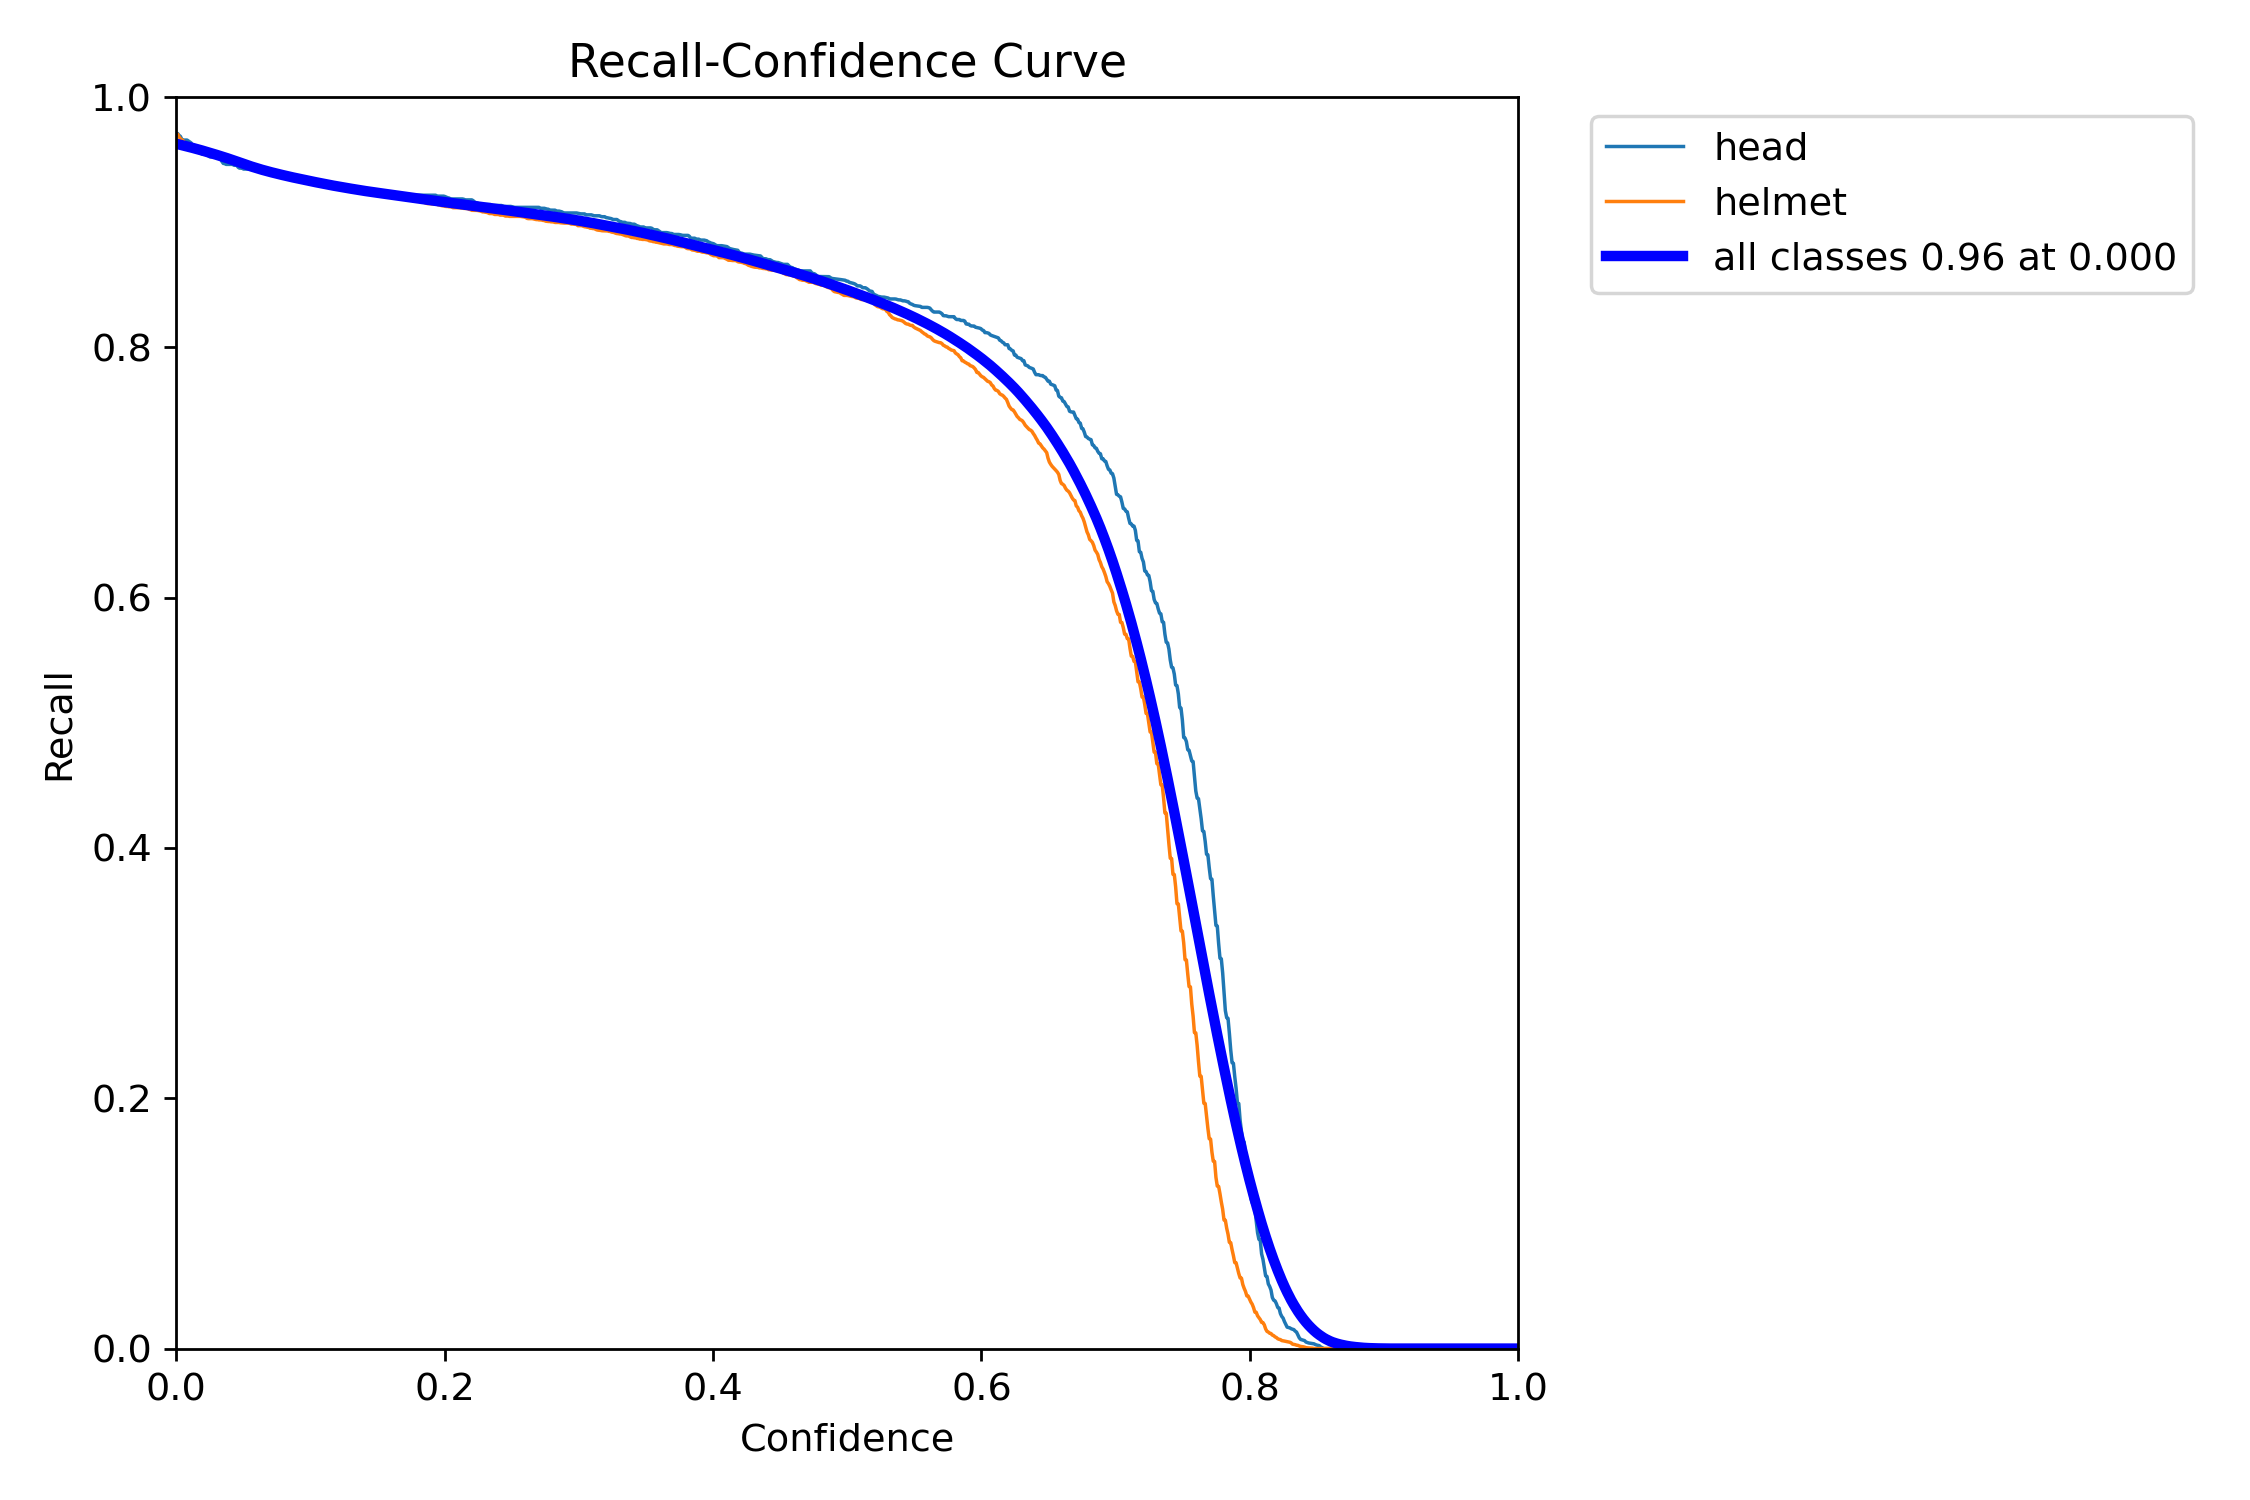


CONFUSION MATRIX:


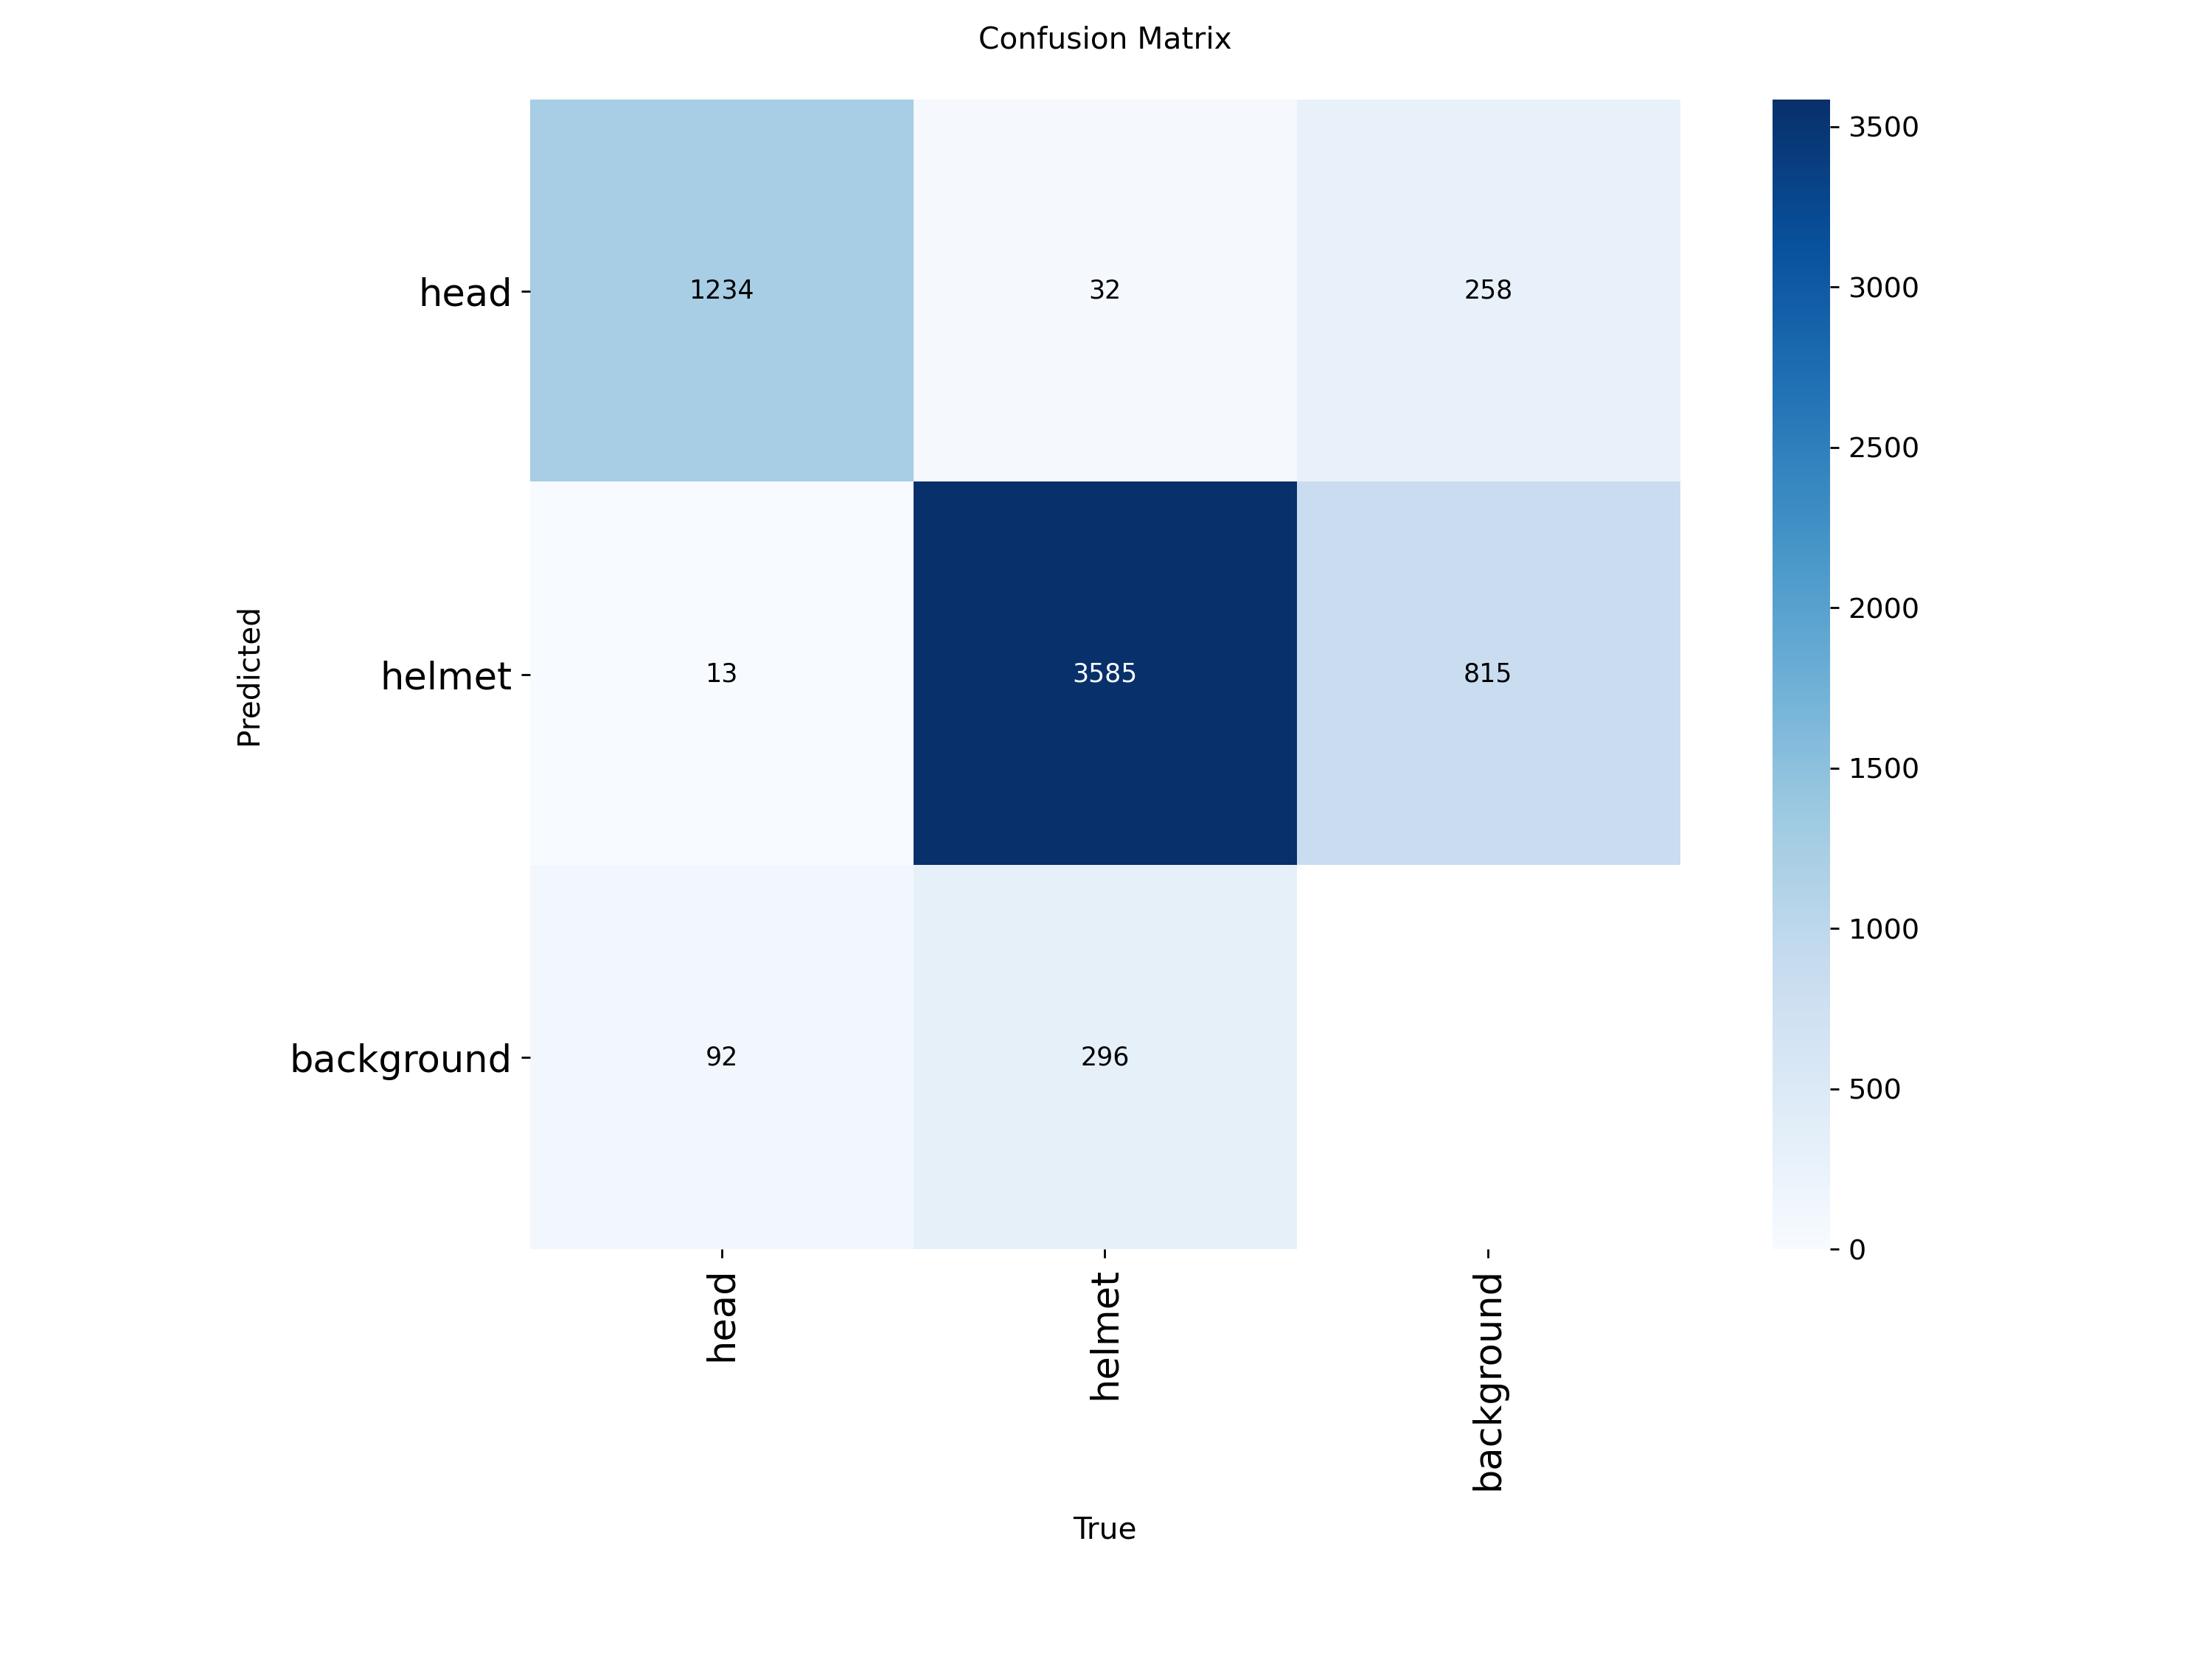


VALIDATION SET PREDICTIONS:


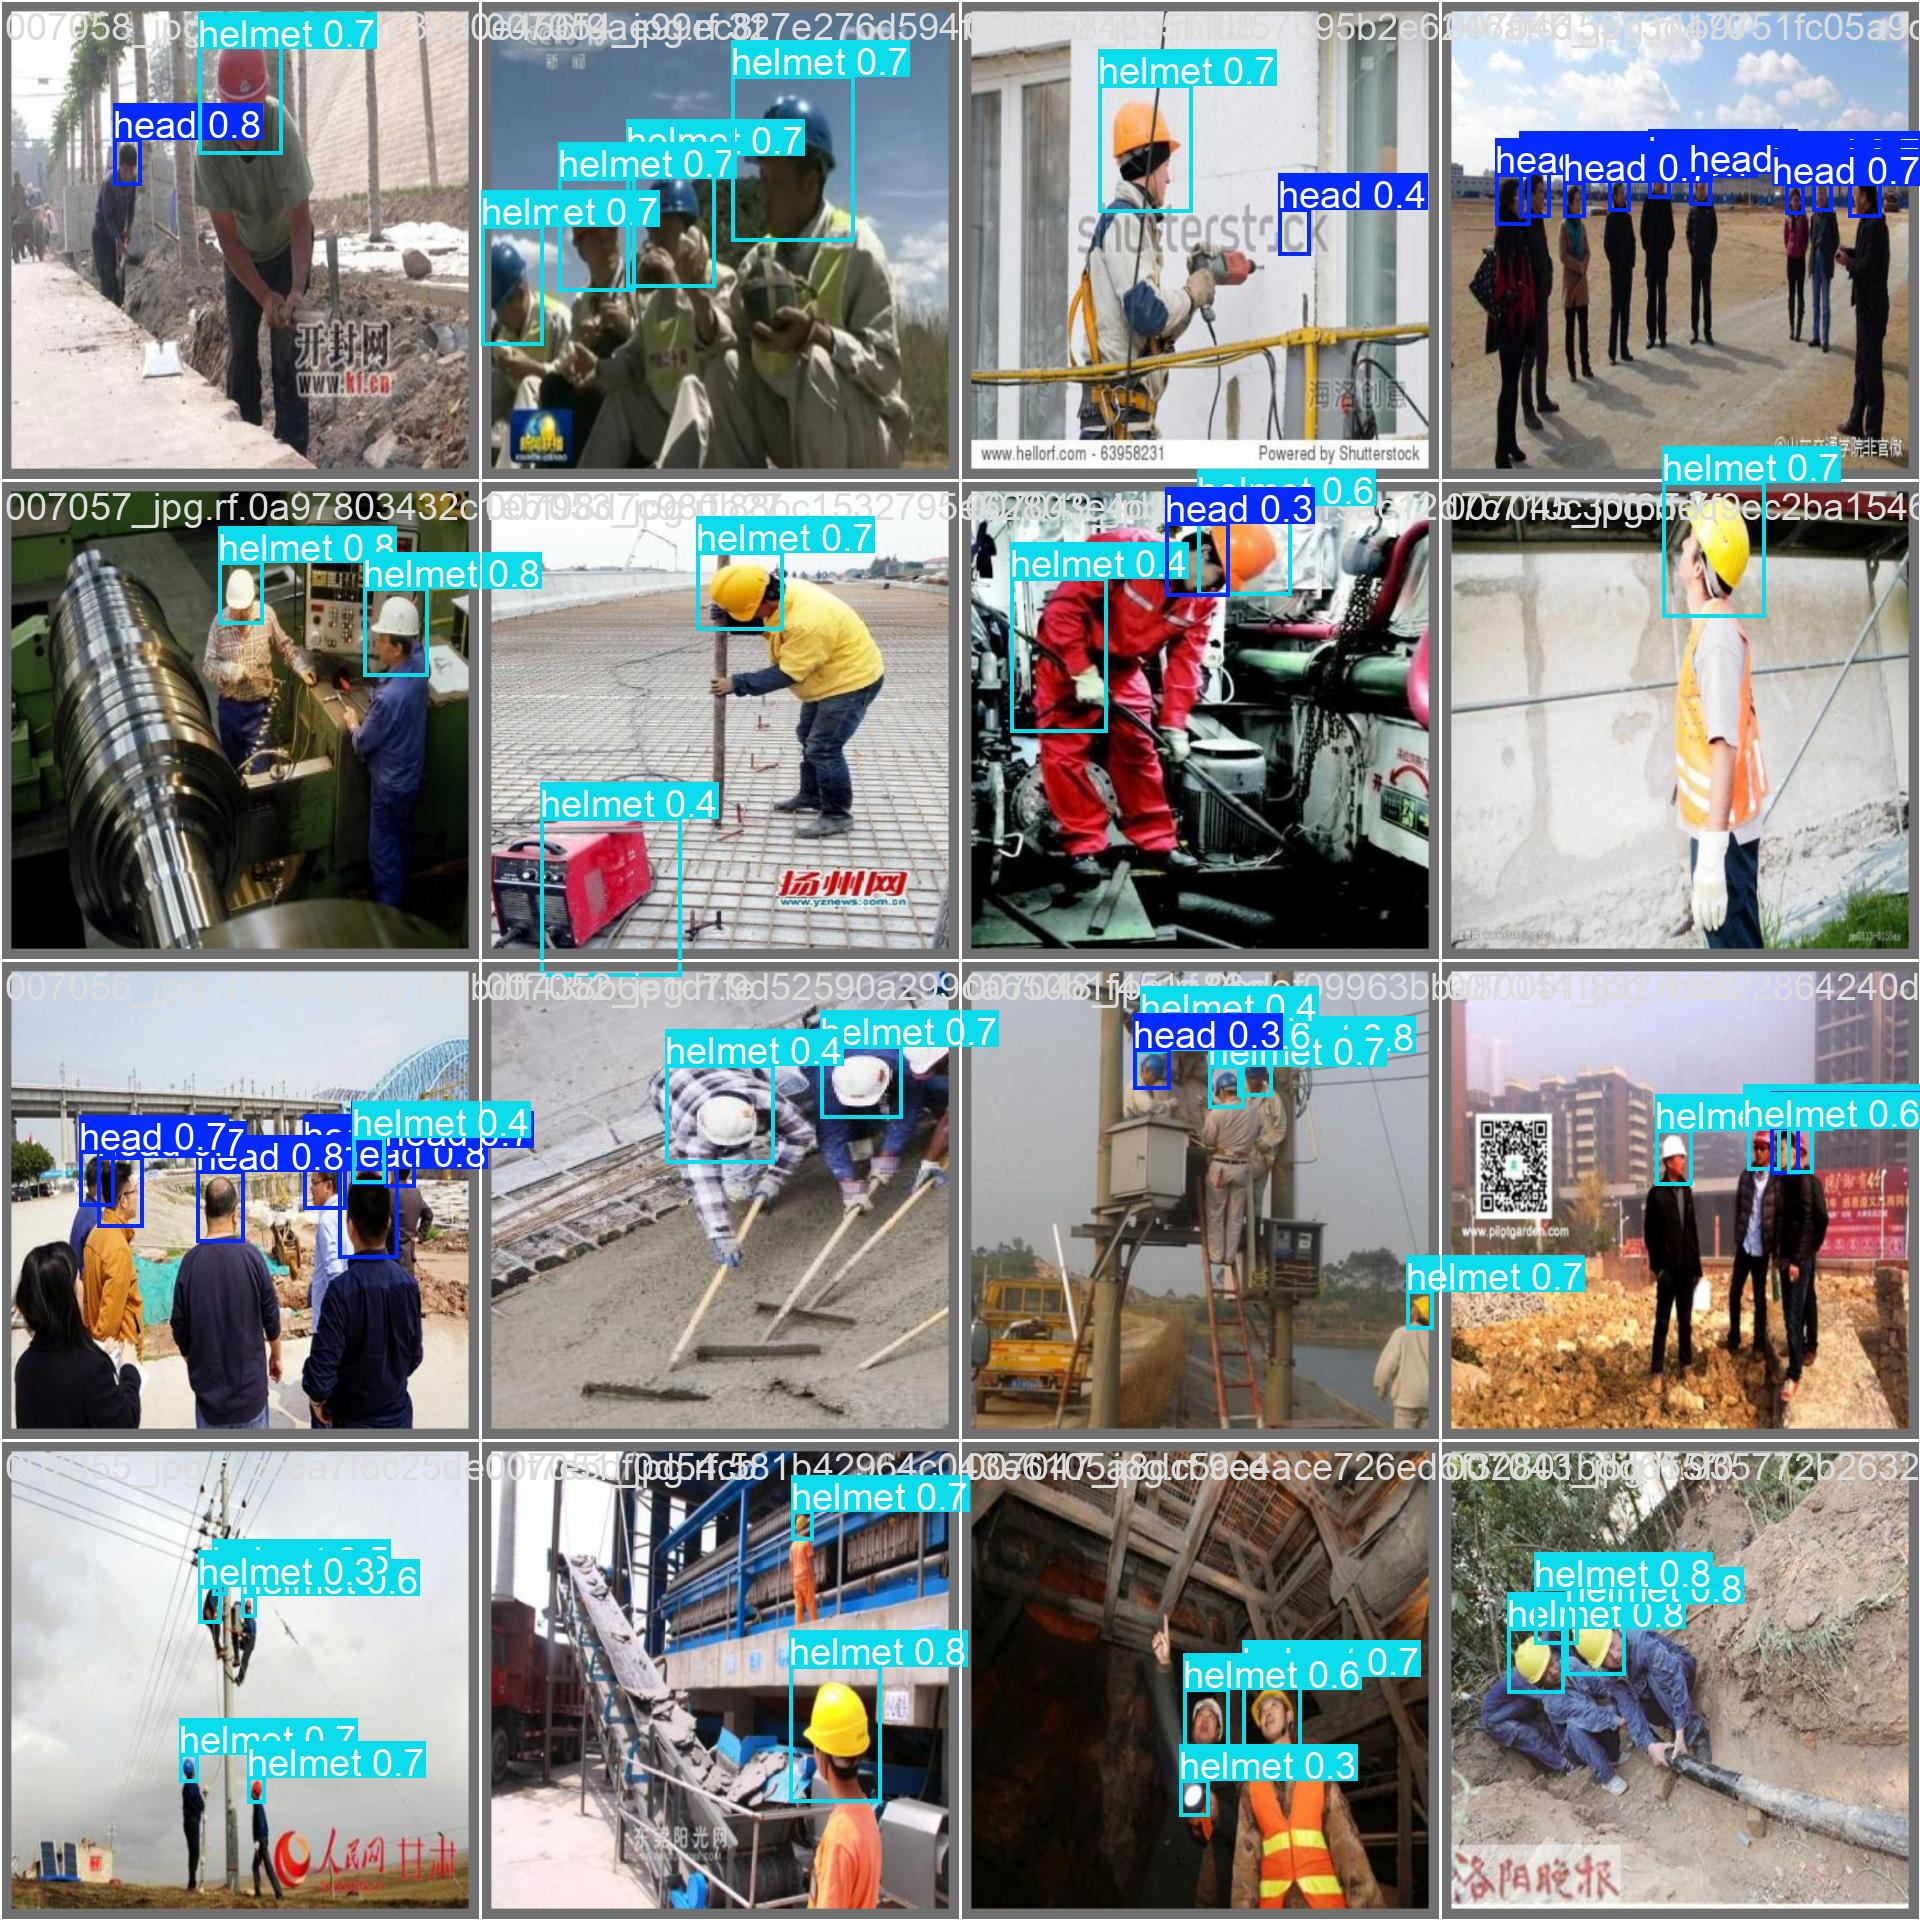

Batch 0 Predictions



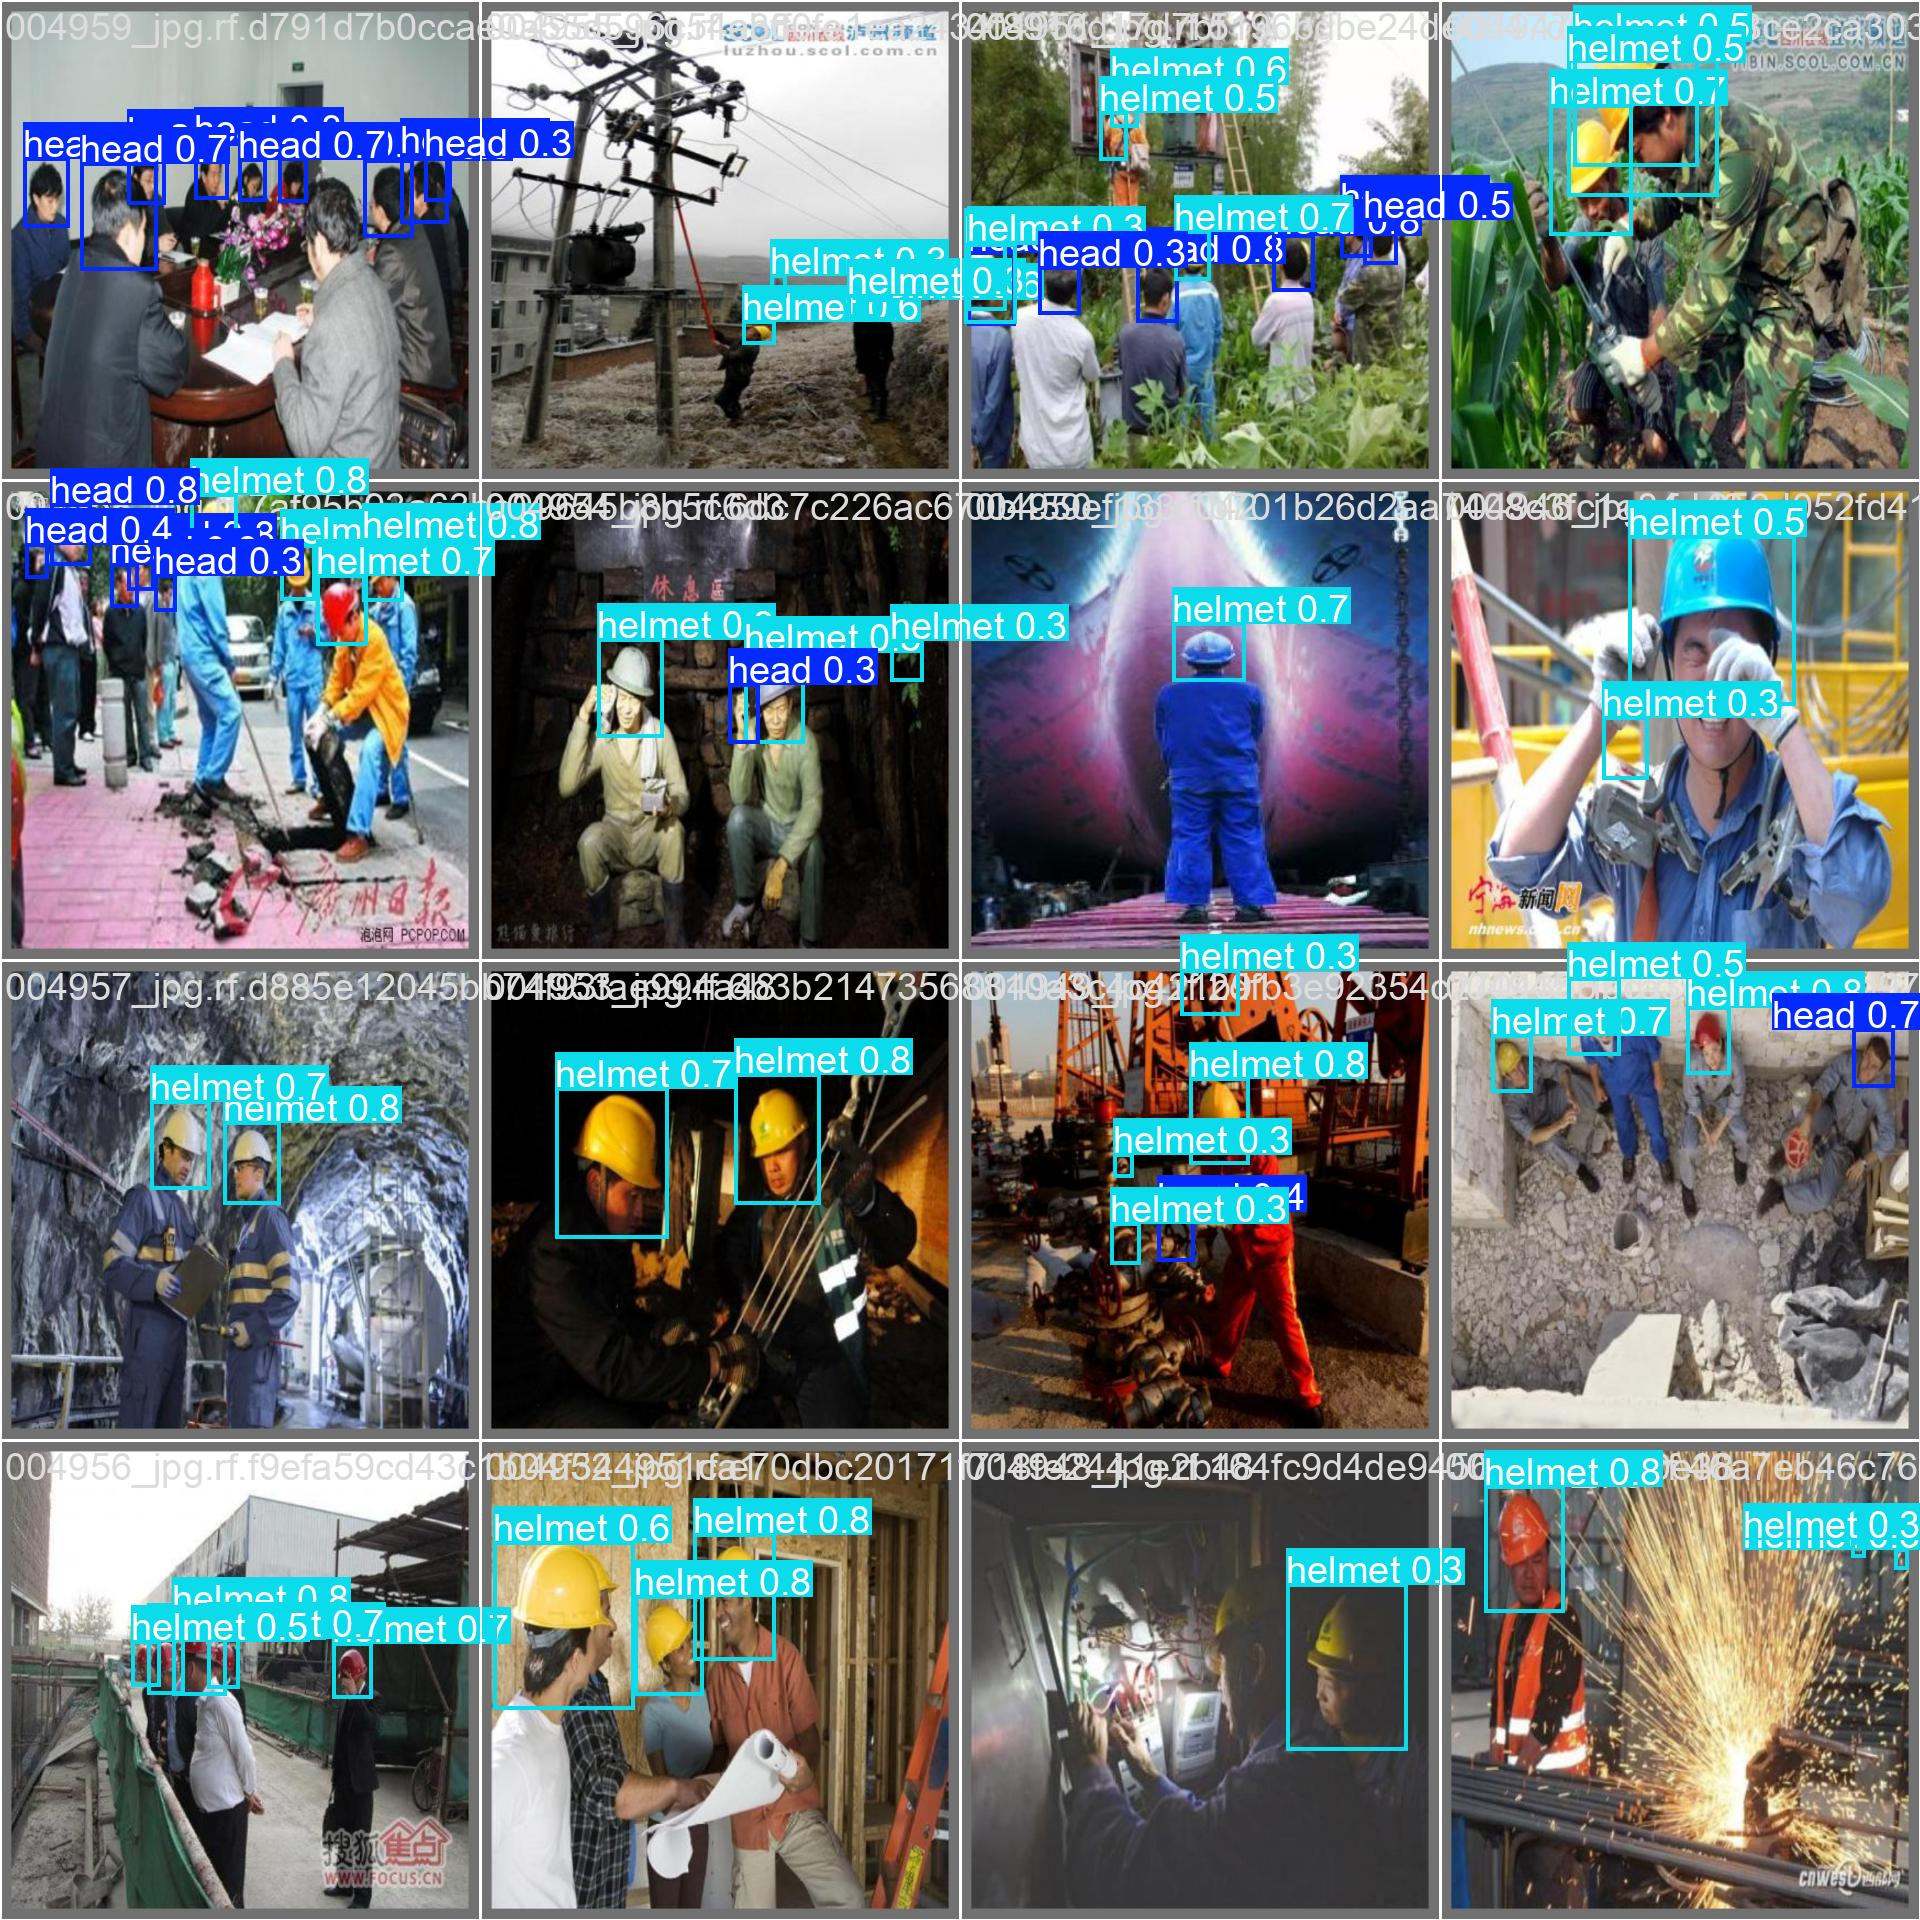

Batch 1 Predictions



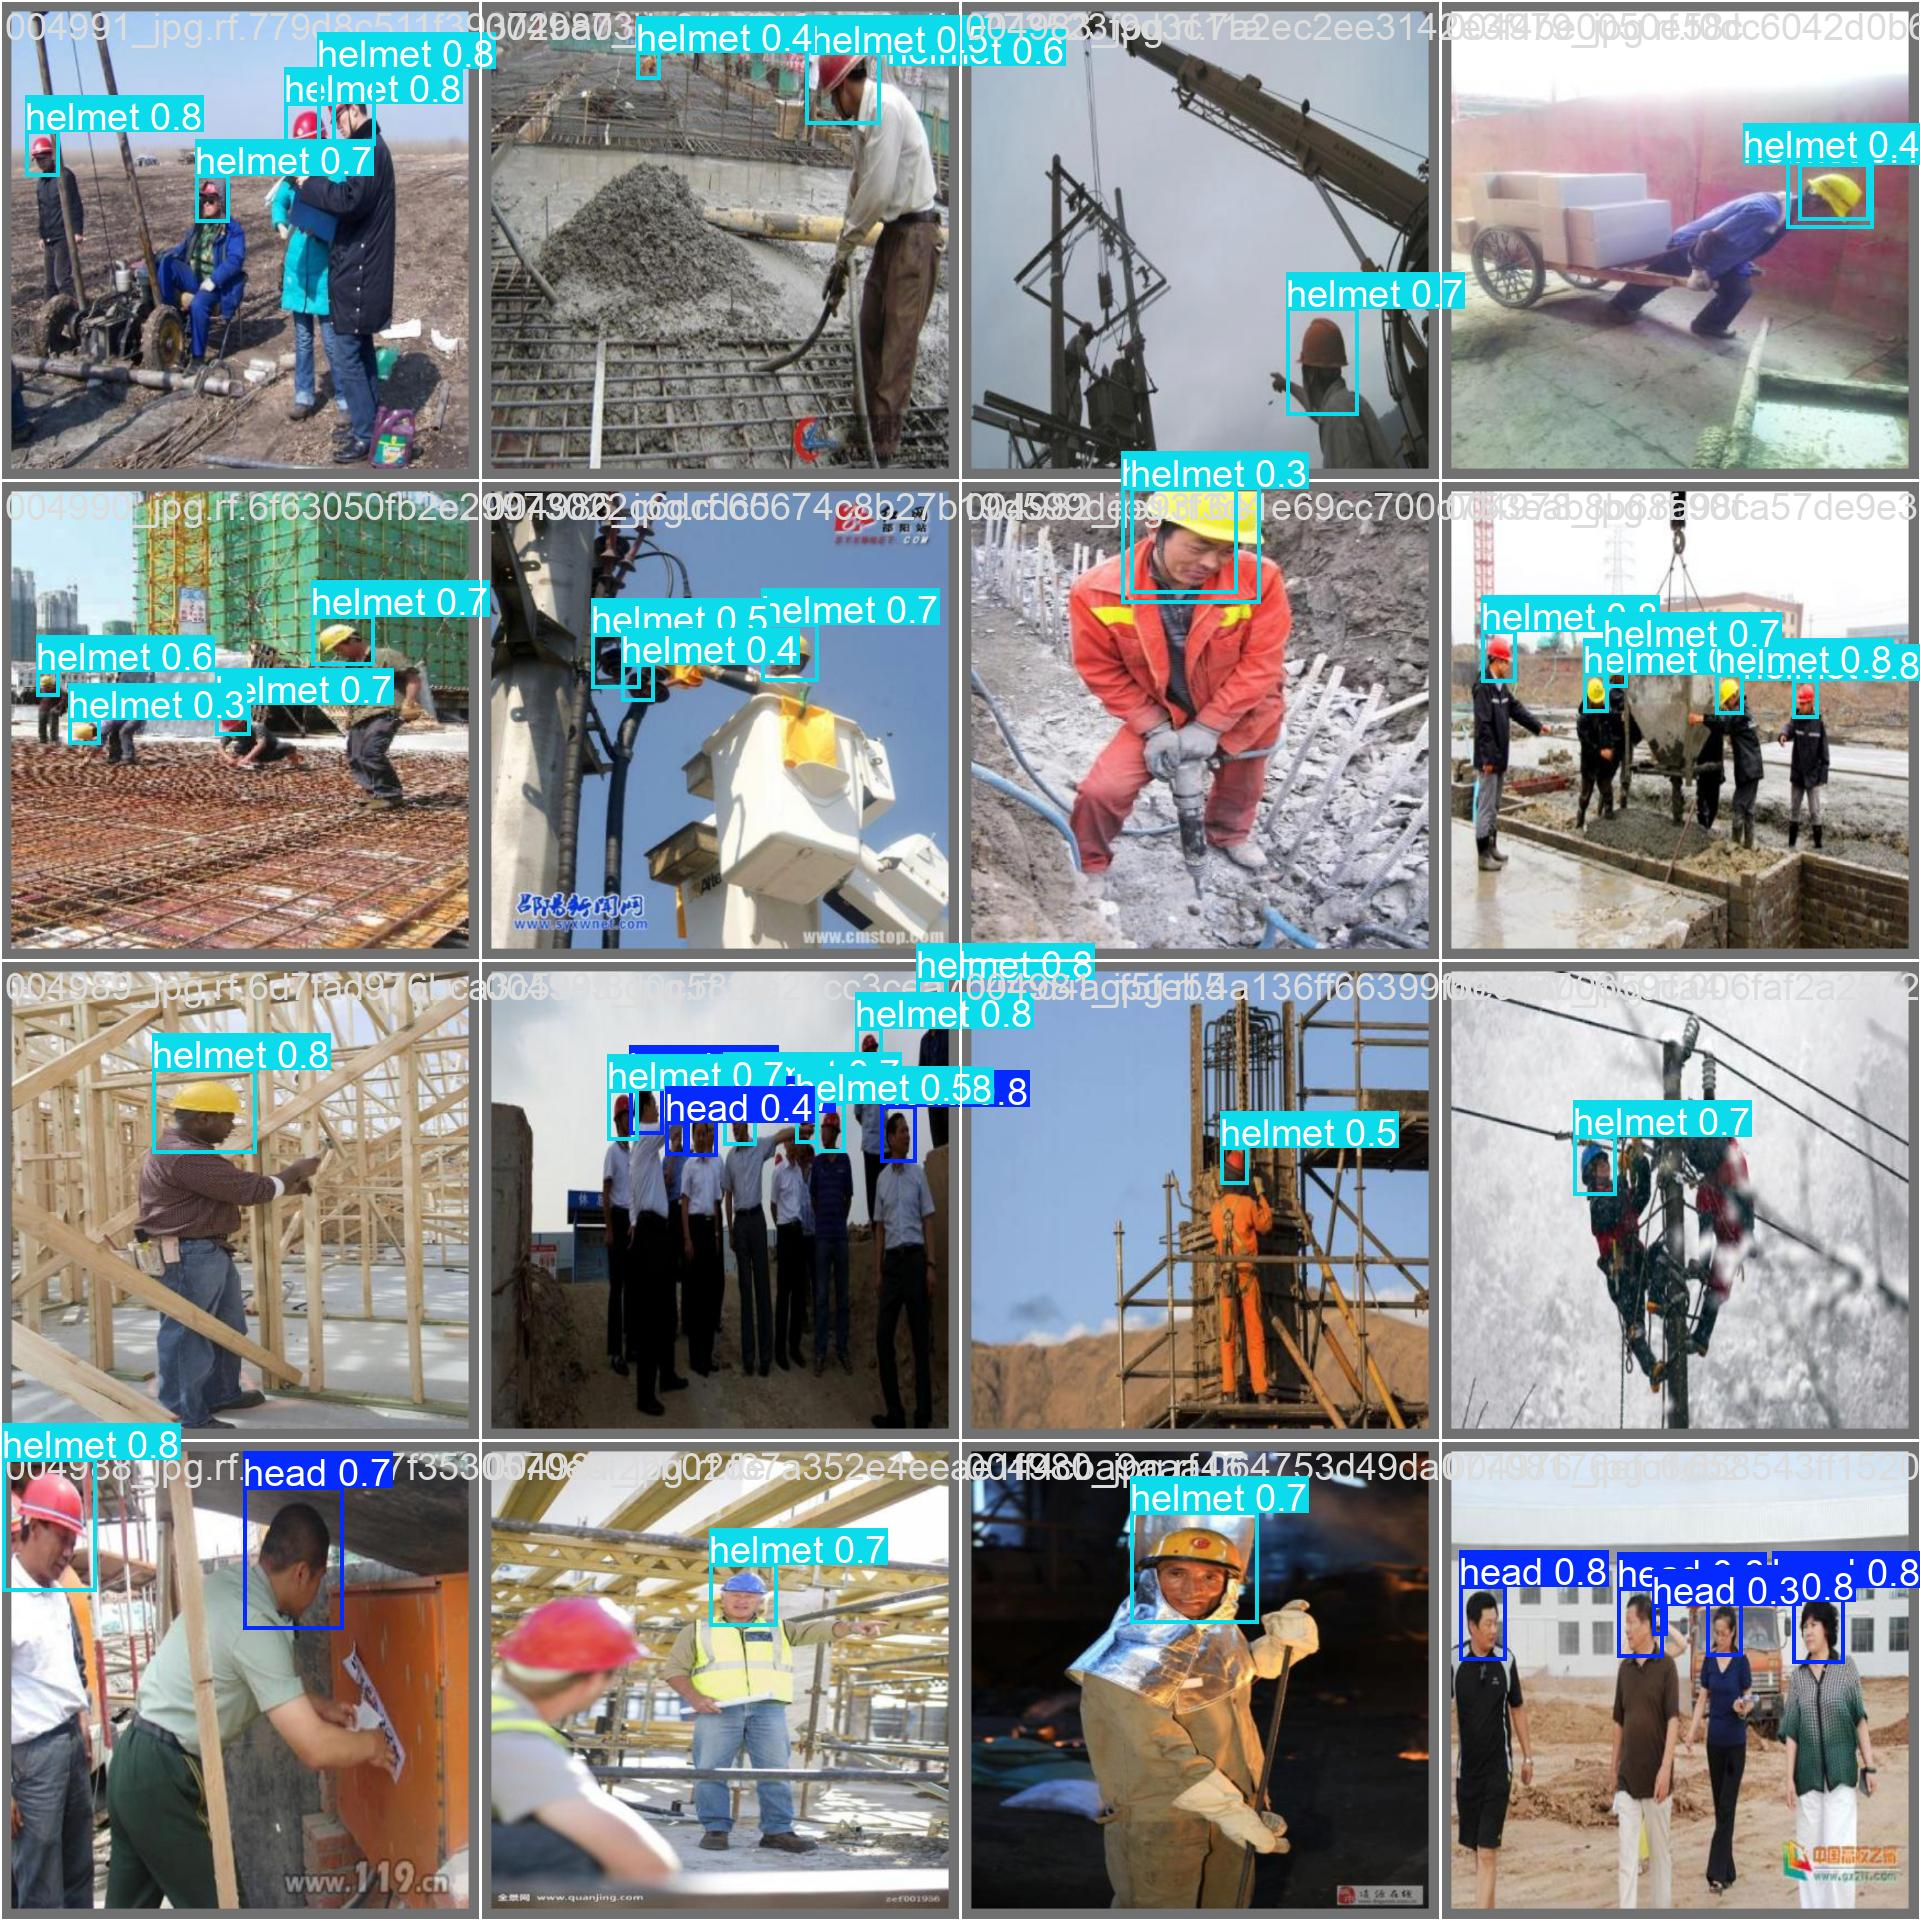

Batch 2 Predictions


MODEL WEIGHTS:
last.pt (49.6 MB)
best.pt (49.6 MB)


In [20]:
import pandas as pd
# ==========================
# CONFIG PATHS
# ==========================
HOME = os.getcwd()
run_path = os.path.join("/content/working", 'hardhat_workers_yolov8s_model4')
dataset_path = "/content/working/hard_hat_dataset"
weights_dir = os.path.join(run_path, 'weights')

# ==========================
# 1. SHOW TRAINING RESULTS CSV
# ==========================
print("TRAINING RESULTS:\n")

results_csv = os.path.join(run_path, 'results.csv')
df = pd.read_csv(results_csv)

# Show last 5 epochs with correct column names
cols_to_show = [
    'epoch', 'train/box_loss', 'train/cls_loss',
    'val/box_loss', 'val/cls_loss',
    'metrics/mAP50(B)', 'metrics/mAP50-95(B)'
]
print(df[cols_to_show].tail(5).to_string(index=False))

# Show final epoch results
final_epoch = df.iloc[-1]
print("\n" + "="*70)
print("FINAL EPOCH RESULTS:")
print("="*70)
print(f"Epoch: {int(final_epoch['epoch'])}")
print(f"Train Box Loss: {final_epoch['train/box_loss']:.4f}")
print(f"Train Cls Loss: {final_epoch['train/cls_loss']:.4f}")
print(f"Val Box Loss: {final_epoch['val/box_loss']:.4f}")
print(f"Val Cls Loss: {final_epoch['val/cls_loss']:.4f}")
print(f"Precision: {final_epoch['metrics/precision(B)']:.4f}")
print(f"Recall: {final_epoch['metrics/recall(B)']:.4f}")
print(f"mAP50: {final_epoch['metrics/mAP50(B)']:.4f}")
print(f"mAP50-95: {final_epoch['metrics/mAP50-95(B)']:.4f}")
print("="*70)

# ==========================
# 2. SHOW TRAINING CURVES
# ==========================
print("\nTRAINING CURVES:")
results_png = os.path.join(run_path, 'results.png')
display(DisplayImage(filename=results_png, width=700))

# ==========================
# 3. SHOW Evaluation CURVES
# ==========================

curve_files = {
    "F1 Score Curve": "BoxF1_curve.png",
    "Precision-Recall Curve": "BoxPR_curve.png",
    "Precision Curve": "BoxP_curve.png",
    "Recall Curve": "BoxR_curve.png"
}
print("\nDISPLAYING EVALUATION CURVES:")

for label, file_name in curve_files.items():
    file_path = os.path.join(run_path, file_name)
    if os.path.exists(file_path):
        print(f"\n{label}:")
        display(DisplayImage(filename=file_path, width=700))
    else:
        print(f"\n{label}: File not found ({file_name})")
# ==========================
# 4. SHOW CONFUSION MATRIX
# ==========================
print("\nCONFUSION MATRIX:")
confusion_png = os.path.join(run_path, 'confusion_matrix.png')
display(DisplayImage(filename=confusion_png, width=700))

# ==========================
# 5. SHOW VALIDATION PREDICTIONS
# ==========================

print("\nVALIDATION SET PREDICTIONS:")
for i in range(3):
    val_img = os.path.join(run_path, f'val_batch{i}_pred.jpg')
    display(DisplayImage(filename=val_img, width=700))
    print(f"Batch {i} Predictions\n")

# ==========================
# 6. SHOW MODEL WEIGHTS
# ==========================
print("\nMODEL WEIGHTS:")
for file in os.listdir(weights_dir):
    file_path = os.path.join(weights_dir, file)
    file_size = os.path.getsize(file_path) / (1024 * 1024)
    print(f"{file} ({file_size:.1f} MB)")



# **Testing The Model on Actual Images(Test set)**


image 1/706 /content/working/hard_hat_dataset/test/images/005298_jpg.rf.8735bf2b956d26c1f6ef23b09c93fe97.jpg: 640x640 8 helmets, 36.9ms
image 2/706 /content/working/hard_hat_dataset/test/images/005299_jpg.rf.7e8cbce0496f979e698687003725214c.jpg: 640x640 1 helmet, 36.2ms
image 3/706 /content/working/hard_hat_dataset/test/images/005300_jpg.rf.2c31335b78e142e0ab5b0cabb142091b.jpg: 640x640 3 helmets, 28.0ms
image 4/706 /content/working/hard_hat_dataset/test/images/005301_jpg.rf.fdc6cb9fe5fe9a5132e80033cb81f049.jpg: 640x640 5 heads, 27.7ms
image 5/706 /content/working/hard_hat_dataset/test/images/005302_jpg.rf.e65eb388c2cfb4fb39130ed61ff7c283.jpg: 640x640 3 helmets, 27.5ms
image 6/706 /content/working/hard_hat_dataset/test/images/005303_jpg.rf.afcdb38c41ef7faad117a0cb8a8f3f3d.jpg: 640x640 1 head, 7 helmets, 27.6ms
image 7/706 /content/working/hard_hat_dataset/test/images/005304_jpg.rf.5b58b8e11864d2382bcc58af36b34f5a.jpg: 640x640 4 helmets, 25.0ms
image 8/706 /content/working/hard_hat_data

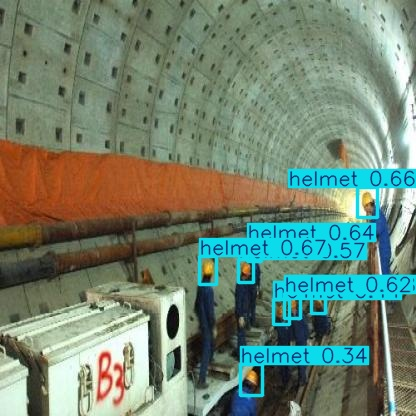

2. 005299_jpg.rf.7e8cbce0496f979e698687003725214c.jpg


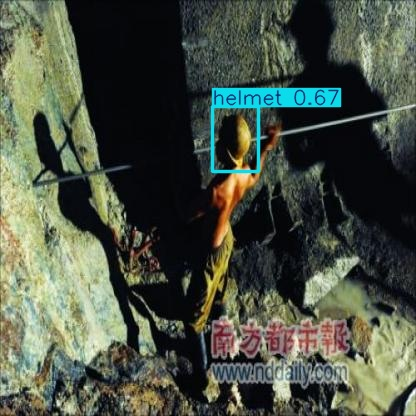

3. 005300_jpg.rf.2c31335b78e142e0ab5b0cabb142091b.jpg


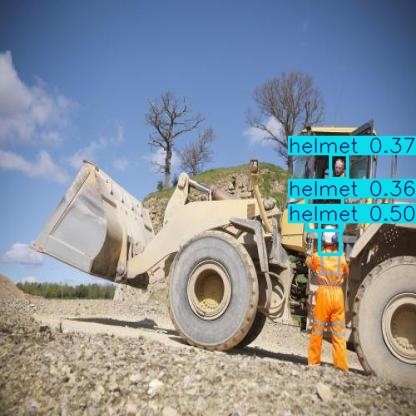

4. 005301_jpg.rf.fdc6cb9fe5fe9a5132e80033cb81f049.jpg


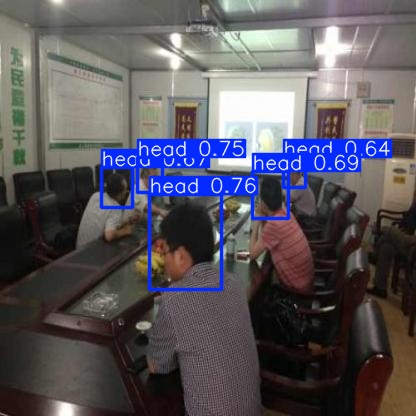

5. 005302_jpg.rf.e65eb388c2cfb4fb39130ed61ff7c283.jpg


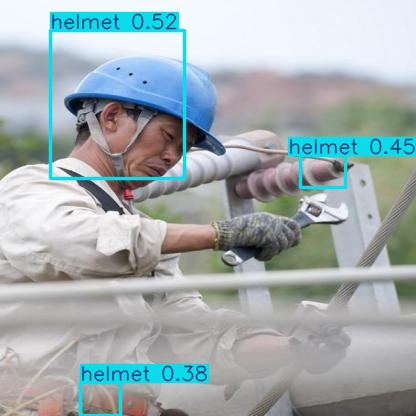

6. 005303_jpg.rf.afcdb38c41ef7faad117a0cb8a8f3f3d.jpg


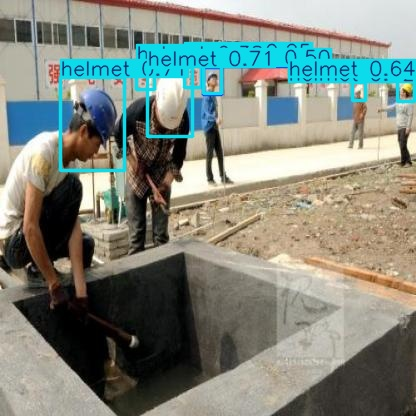

7. 005304_jpg.rf.5b58b8e11864d2382bcc58af36b34f5a.jpg


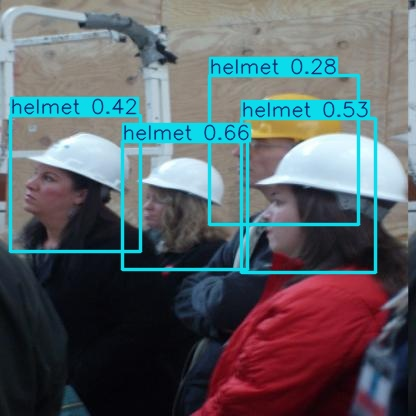

8. 005305_jpg.rf.ed65c8960d04e48658061aacd174b32f.jpg


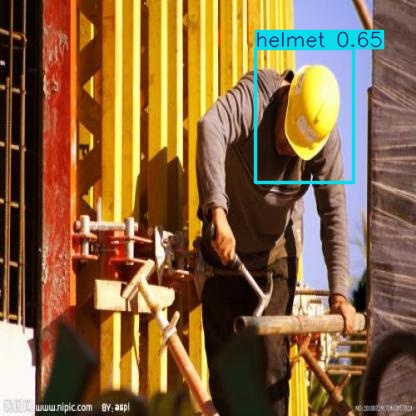

9. 005306_jpg.rf.17db387e900596dda895e70f81795501.jpg


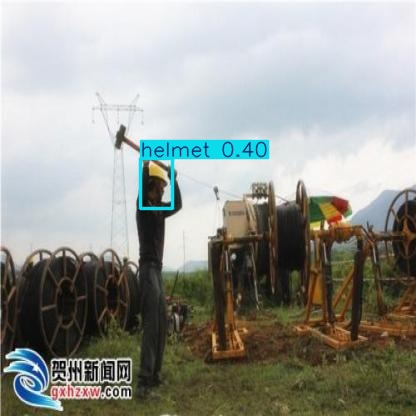

10. 005307_jpg.rf.ea4cdc4e607af2519b0c1342c2111499.jpg


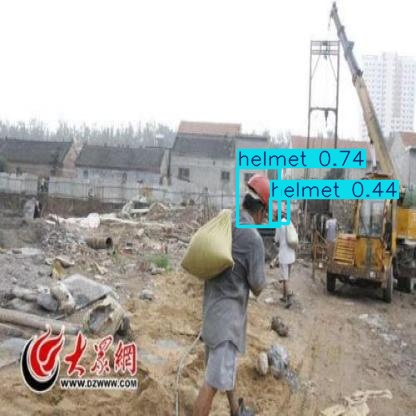


Total test images processed: 706
All results saved to: /content/runs/detect/predict6


In [15]:
# ==========================
# CONFIG PATHS
# ==========================
HOME = os.getcwd()

# Load the trained YOLOv8 model
model_path = os.path.join("/content/working", "hardhat_workers_yolov8s_model4", "weights", "best.pt")
model = YOLO(model_path)

# Path for the test images
test_images_path = os.path.join("/content/working/hard_hat_dataset", "test", "images")

# ==========================
# RUN INFERENCE
# ==========================
pred_results = model.predict(
    source=test_images_path,
    conf=0.25,       # confidence threshold
    iou=0.45,        # NMS IoU threshold
    save=True,       # save predictions to disk
    imgsz=640        # inference image size
)

# Output directory
pred_dir = pred_results[0].save_dir
print(f"\nPredictions saved to: {pred_dir}")

# ==========================
# DISPLAY PREDICTIONS
# ==========================
pred_images = sorted(glob.glob(os.path.join(pred_dir, "*.jpg")))

print("\nDisplaying first 10 test predictions:")
for i, img_path in enumerate(pred_images[:10], 1):  # show first 10 images
    filename = os.path.basename(img_path)
    print(f"{i}. {filename}")
    display(DisplayImage(filename=img_path, width=600))

# ==========================
# SUMMARY
# ==========================
print("\n" + "="*70)
print(f"Total test images processed: {len(pred_images)}")
print(f"All results saved to: {pred_dir}")
print("="*70)
